# 데이터 시각화 종합 연습문제


## 01.데이터 분포 | 문제1
kings_life 데이터는 조선시대 역대 왕의 수명을 조사한 데이터이다.수명에 대해 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.


#### 패키지 참조

In [113]:
from hossam import load_data                 #글꼴을 시스템에 등록
from matplotlib import font_manager as fm    #캔버스 생성, 기본 그래픽 함수 제공
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from pandas import melt,pivot_table
from pandas import DataFrame
import datetime as dt
import pandas as pd



#### 그래프 초기화

In [114]:
#한글을 지원하는 폰트 파일의 경로
font_path ='./NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 데이터 로드

In [115]:
kings_life = load_data('kings_life')
kings_life.head()

[data] https://data.hossam.kr/data/lab06/kings_life.xlsx
[desc] 조선시대 역대 왕의 수명을 조사한 데이터 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,왕,수명
0,태조,73
1,정종,62
2,태종,45
3,세종,53
4,문종,38


### 1) 수명에 대한 기술통계량

In [116]:

kings_life.describe().T

,count,mean,std,min,25%,50%,75%,max
수명,27.0,46.037037,16.173296,16.0,33.0,45.0,56.0,82.0


### 2) 상자그림

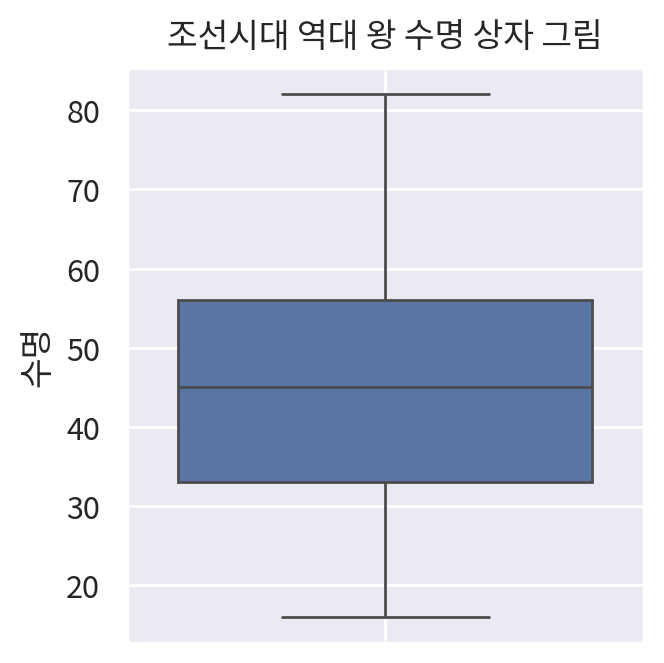

In [117]:
# 1) 그래프 초기화
my_dpi=200
width_px = 720             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) BoxPlot 그리기
sb.boxplot(data=kings_life,y='수명')

# 3) 그래프 꾸미기
ax.set_title("조선시대 역대 왕 수명 상자 그림", fontsize=12, pad=8)
ax.grid(True)                 # 배경 격자 표시

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


### 알 수 있었던 사실
- 평균값 46과 중앙값 45가 비슷하여, 평균을 기준으로 대칭을 이루는 정규분포의 형태로 나이가 분포되어 있음을 알 수 있었다
>  그림 상자를 보았을 때 이상치가 존재하지 않아 평균에 영향을 주는 요인이 줄어들었던 것으로 보인다

## 01.데이터 분포 | 문제2
stock 데이터셋은 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가 데이터의 일부이다.
외국기업과 내국기업별로 기술통계량을 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

### 데이터 로드

In [118]:
stock = load_data('stock')
stock.head()

[data] https://data.hossam.kr/data/lab06/stock.xlsx
[desc] 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가 데이터 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,구분,주가
0,F,120
1,K,165
2,K,147
3,F,144
4,K,135


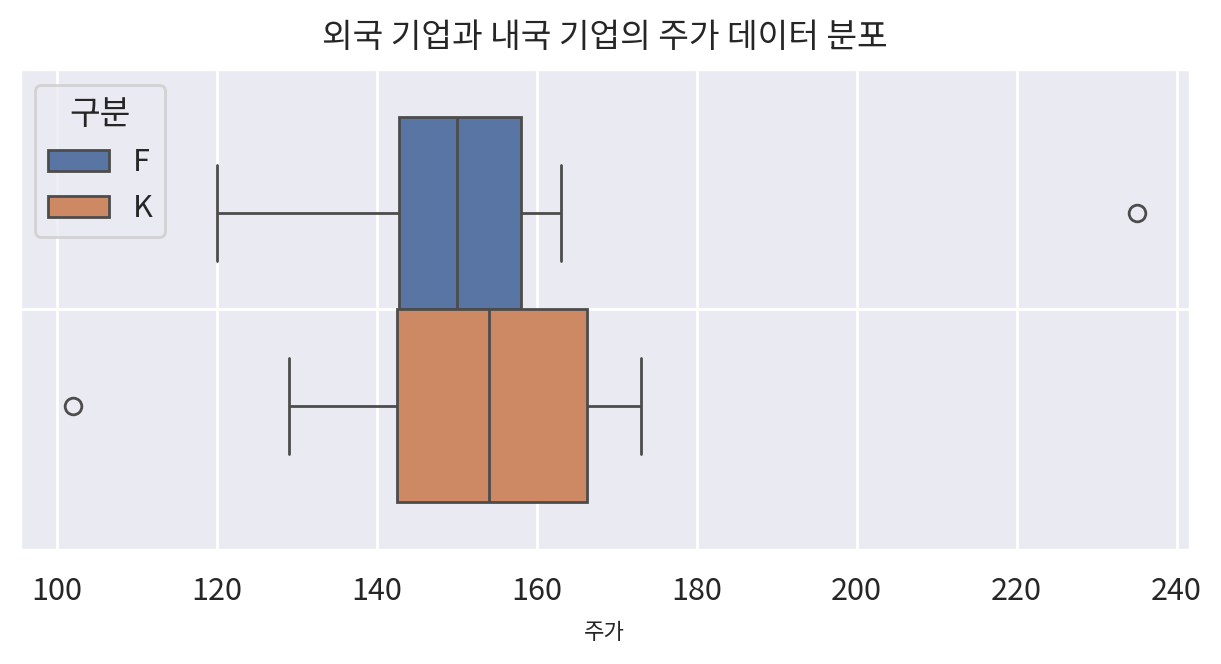

In [119]:
# 외국기업과 내국기업별로 기술통계량을 상자그림을 그려서 비교/분석하라.
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) BoxPlot 그리기
sb.boxplot(data=stock, x='주가', hue='구분')

# 3) 그래프 꾸미기
ax.set_title("외국 기업과 내국 기업의 주가 데이터 분포", fontsize=12, pad=8)
ax.set_xlabel("주가", fontsize=8, labelpad=5)
ax.grid(True)                 # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


### 알 수 있었던 사실
- 금융사 중 내국 기업(K) 의 주가의 중앙값이 외국기업 (F) 보다 높으며 전반적으로 내국 기업의 주가가 더 높음을 확인했다
- 외국 기업의 경우 주가의 범위가 좌측 꼬리가 더 길어 낮은 주가의 회사가 내국 기업보다 더 많음을 확인했다

## 01.데이터 분포 | 문제3
grape 데이터셋은 포도농장에서 수집한 비료 종류에 따른 수확량 자료이다.
비료 종류별로 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는사실을 하나 이상 제시하라.

In [120]:
grape = load_data('grape')
grape.head()

[data] https://data.hossam.kr/data/lab06/grape.xlsx
[desc] 포도농장에서 수집한 비료 종류에 따른 수확량 자료 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,비료종류,수확량
0,A,39.3
1,B,11.4
2,A,26.6
3,A,23.7
4,B,25.8


In [121]:
# 비료 종류별로 기술통계량을 구하고 상자그림을 그려라.
category = sorted(list(grape['비료종류'].unique()))
category

['A', 'B']

In [122]:
grape.query('비료종류 == "A"').describe().T

,count,mean,std,min,25%,50%,75%,max
수확량,7.0,26.357143,6.578211,17.9,23.95,24.3,27.55,39.3


In [123]:
grape.query('비료종류 == "B"').describe().T

,count,mean,std,min,25%,50%,75%,max
수확량,4.0,18.7,6.17252,11.4,15.225,18.8,22.275,25.8


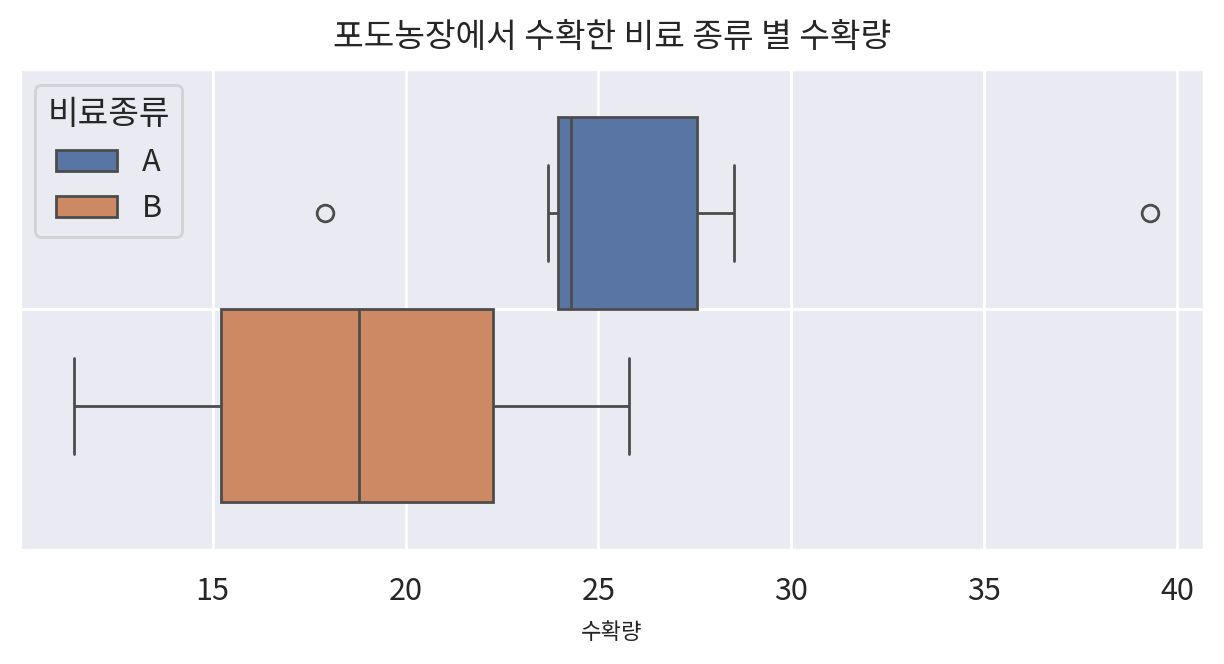

In [ ]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) BoxPlot 그리기
sb.boxplot(data=grape, x='수확량', hue='비료종류')

# 3) 그래프 꾸미기
ax.set_title("포도농장에서 수확한 비료 종류 별 수확량", fontsize=12, pad=8)
ax.set_xlabel("수확량", fontsize=8, labelpad=5)
ax.grid(True)                 # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


#### 알 수 있었던 사실
- 비료 사용에 따른 수확량은 전체적으로 B 보다 A 의 경우가 더 높았다
- 비료 B 의 경우, 수확량의 평균과 중앙값이 모두 18로 비슷한 수준을 보이면서 수확량이 정규 분포를 따르는 것으로 확인되었다.
- 비료 A 의 경우 이상치가 확인되었고 , 이로 인해 평균값 (26) 이 영향을 받아 중앙값 (24) 와는 소폭 차이가 있는 것으로 확인되었다


## 01.데이터 분포 | 문제4
analysis_grade 데이터셋은 통계학개론을 수강하는 두 학과(A, C)의 성적분포 데이터의 일부이다. 이 두 그룹을 비교하기 위한 기술통계량을 구하고 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.


In [125]:
analysis_grade = load_data('analysis_grade')
analysis_grade.head()

[data] https://data.hossam.kr/data/lab06/analysis_grade.xlsx
[desc] 통계학개론을 수강하는 두 학과(A, C)의 성적분포 데이터의 일부 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,학과,점수
0,C,54
1,A,52
2,A,37
3,C,41
4,A,67


In [126]:
#학과 A 에 대한 기술통계량
analysis_grade.query('학과 == "A"').describe().T

,count,mean,std,min,25%,50%,75%,max
점수,20.0,43.75,20.229928,10.0,29.5,42.5,55.0,78.0


In [127]:
#학과 C 에 대한 기술통계량
analysis_grade.query('학과 == "C"').describe().T

,count,mean,std,min,25%,50%,75%,max
점수,12.0,56.166667,14.68972,41.0,50.25,52.5,54.25,90.0


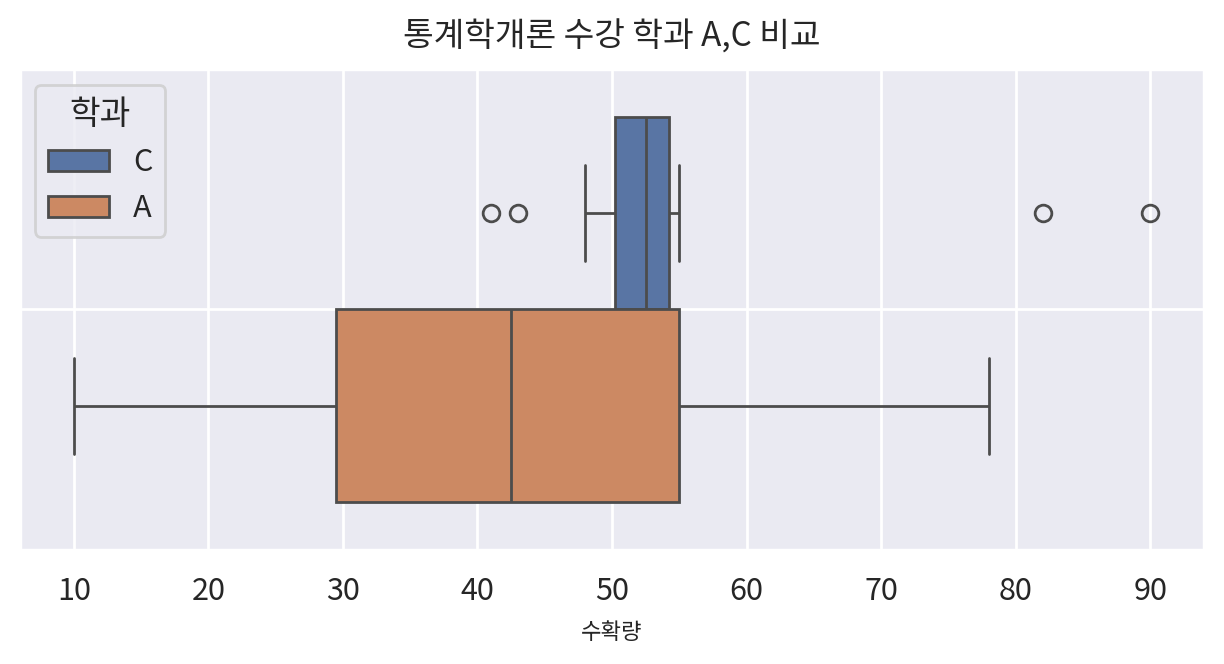

In [128]:
# 1) 그래프 초기화
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수

figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) BoxPlot 그리기
sb.boxplot(data=analysis_grade, x='점수', hue='학과')

# 3) 그래프 꾸미기

ax.set_title("통계학개론 수강 학과 A,C 비교", fontsize=12, pad=8)
ax.set_xlabel("수확량", fontsize=8, labelpad=5)
ax.grid(True)                 # 배경 격자 표시/숨김

# 4) 출력
plt.tight_layout()            # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                    # 그래프 화면 출력
plt.close()                   # 그래프 작업 종료


#### 알 수 있었던 사실
- 학과 C 의 통계학개론 점수 평균 및 중앙값이 A 보다 더 높다
- 학과 A 의 점수가 더 넓게 분포하고 있다 (표준 편차 A>C )
- 학과 C 에는 소수의 고득점자가 존재한다 (이상치)

## 01.데이터 분포 | 문제5

- stat_comp_grade 데이터셋은 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적을 나타낸 표이다.

1. 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.

2. 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

3. 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실 을 하나 이상 제시하라.

4. 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.


In [129]:
stat_comp_grade = load_data('stat_comp_grade')
stat_comp_grade.head()

[data] https://data.hossam.kr/data/lab06/stat_comp_grade.xlsx
[desc] 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적 (출처: 방송통신대학교 통계학개론 수업내용에서 발췌)
[!] Cannot read metadata


,전공,중간고사,기말고사
0,STAT,34,86
1,STAT,50,77
2,STAT,75,74
3,COMP,76,96
4,COMP,61,78


#### 5-1. 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.

In [130]:

stat_comp_grade_copy = stat_comp_grade.copy()

stat_comp_grade_copy['전공_LABEL'] = np.where (stat_comp_grade_copy['전공']=='STAT','1','2')

stat_comp_grade_copy.head()

,전공,중간고사,기말고사,전공_LABEL
0,STAT,34,86,1
1,STAT,50,77,1
2,STAT,75,74,1
3,COMP,76,96,2
4,COMP,61,78,2


#### 5-2. 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [131]:

#중간고사 기술통계량
중간고사_기술통계_시리즈=stat_comp_grade_copy['중간고사'].describe()
중간고사_기술통계_df=DataFrame(중간고사_기술통계_시리즈)
중간고사_기술통계_df.T


,count,mean,std,min,25%,50%,75%,max
중간고사,20.0,65.15,19.647619,31.0,48.5,67.5,78.5,94.0


In [132]:
#기말고사 기술통계량
기말고사_기술통계_시리즈=stat_comp_grade_copy['기말고사'].describe()
기말고사_기술통계_df=DataFrame(기말고사_기술통계_시리즈)
기말고사_기술통계_df.T

,count,mean,std,min,25%,50%,75%,max
기말고사,20.0,75.65,15.597824,40.0,66.0,79.0,85.25,96.0


#### 기술통계량을 기반으로 알 수 있는 점
- 중간고사 점수의 분포가 더 넓게 형성되어 있다 (표준편차가 더 큼)
- 중간고사와 기말고사 모두 평균이 중앙값보다 낮다, 이상치 중 유독 낮은 점수의 학생들이 중간고사와 기말고사 모두에 존재하는 것이 확인 되었다

#### 5-3. 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실 을 하나 이상 제시하라.

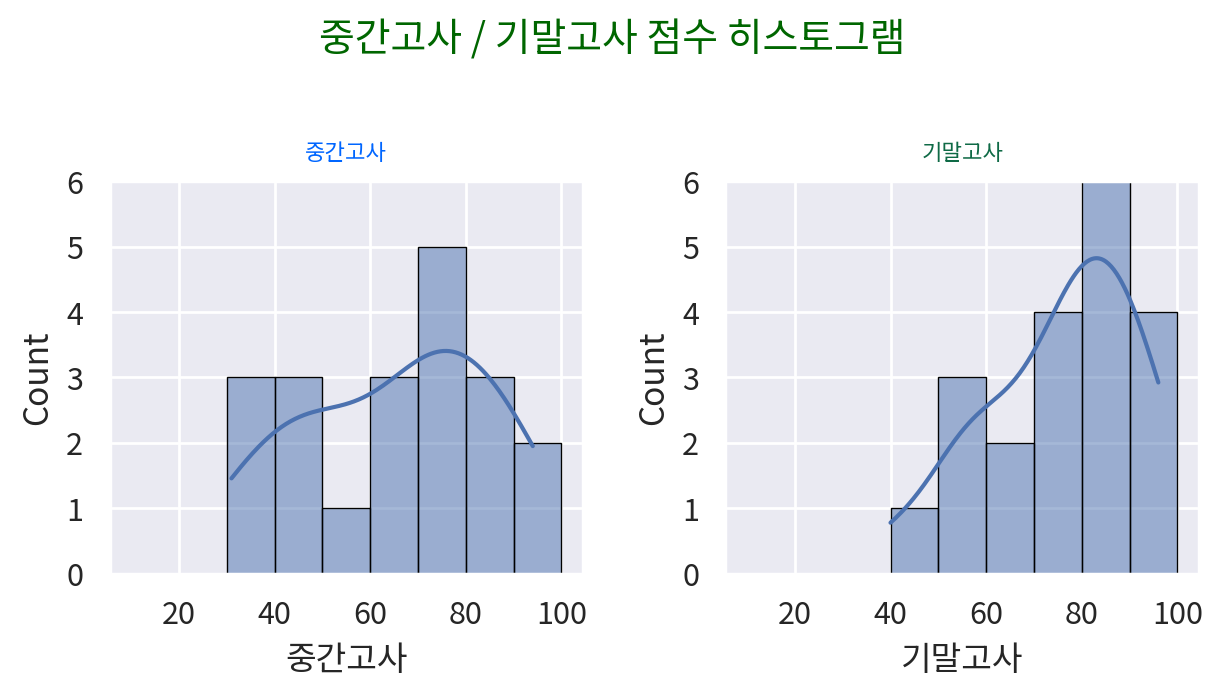

In [133]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 2                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용

sb.histplot(
    data=stat_comp_grade_copy, x="중간고사",
    edgecolor="#000000", linewidth=0.5 , kde=True,ax=ax[0],bins=[10,20,30,40,50,60,70,80,90,100]
)

sb.histplot(
    data=stat_comp_grade_copy, x="기말고사",
    edgecolor="#000000", linewidth=0.5 , kde=True,ax=ax[1], bins=[10,20,30,40,50,60,70,80,90,100]
)

# 3) 그래프 꾸미기

#그래프 전체에 대한 제목
fig.suptitle('중간고사 / 기말고사 점수 히스토그램',fontsize = 14 , color ='#006600')

#각 그래프 간의 가로 (wspace) , 세로 (hspace) 간격 지정
fig.subplots_adjust(wspace=0.2 , hspace=0.2)

# 첫 번째 영역 그래프의 제목, 글자크기, 색상, 격자
ax[0].set_title("중간고사", color="#0066ff", fontsize=8, pad=8)

# 두 번째 영역 그래프의 축 설정 및 x, y축 라벨 지정, 격자
ax[1].set_title("기말고사", color="#0f6a46", fontsize=8, pad=8)

ax[0].grid()
ax[1].grid()

ax[0].set_ylim(0, 6)  
ax[1].set_ylim(0, 6)

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


#### 시험 별 히스토그램을 기반으로 알 수 있는 점
- 기말고사의 경우, 고득점수가 많아 우측에서 높은 봉우리가 확인되었다.
- 중간고사의 경우 70-80점의 학생수가 많기는 하지만 전반적으로 완만한 형태의 분포가 확인되었다

#### 5-4. 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.

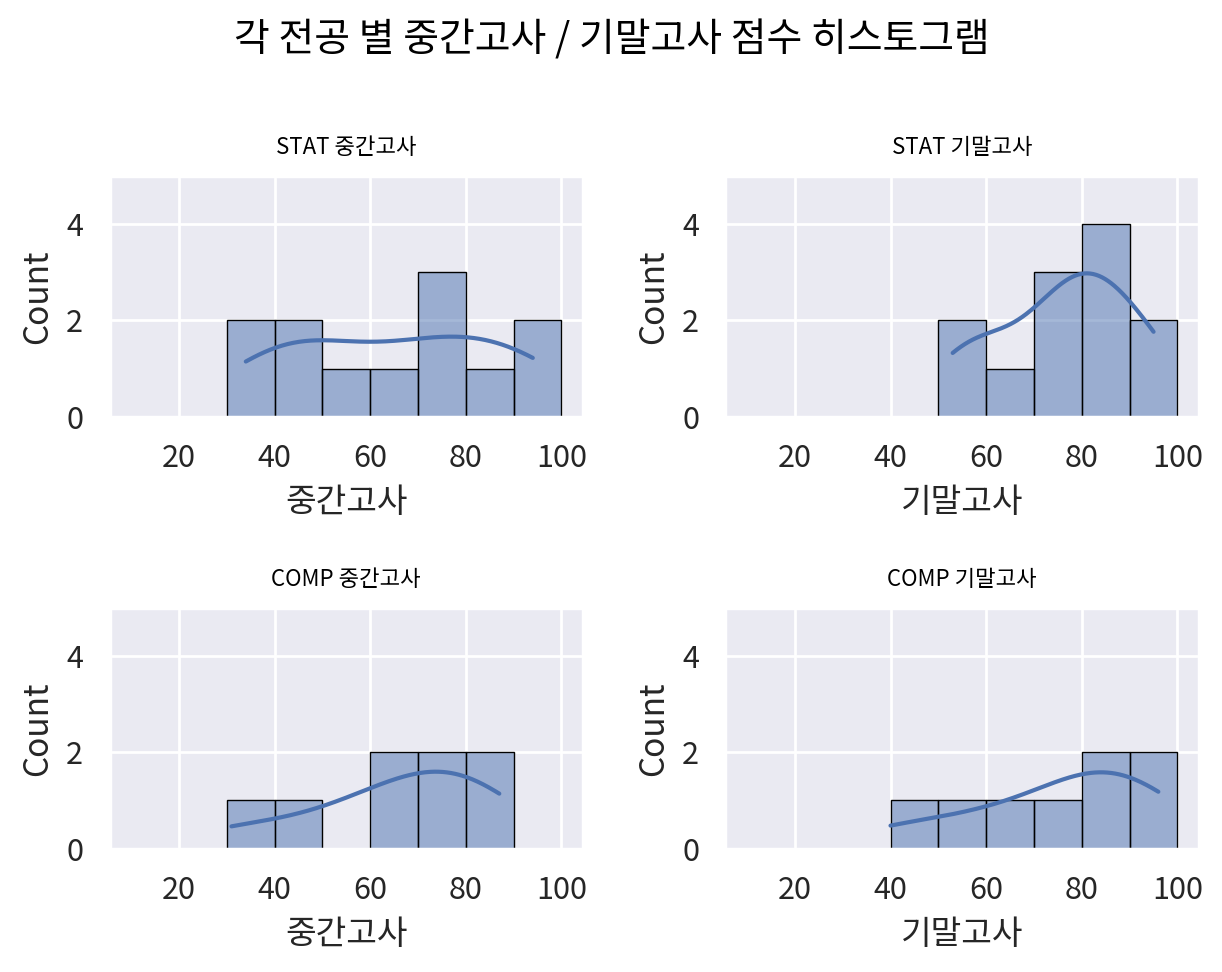

In [134]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px =1000             # 그래프 세로 크기
rows = 2                     # 그래프 행 수
cols = 2                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기 -> seaborn 사용

sb.histplot(
    data=stat_comp_grade_copy.query("전공=='STAT'"), x="중간고사",
    edgecolor="#000000", linewidth=0.5 , kde=True,ax=ax[0][0],bins=[10,20,30,40,50,60,70,80,90,100]
)

sb.histplot(
    data=stat_comp_grade_copy.query("전공=='STAT'"), x="기말고사",
    edgecolor="#000000", linewidth=0.5 , kde=True,ax=ax[0][1],bins=[10,20,30,40,50,60,70,80,90,100]
)

sb.histplot(
    data=stat_comp_grade_copy.query("전공=='COMP'"), x="중간고사",
    edgecolor="#000000", linewidth=0.5 , kde=True,ax=ax[1][0],bins=[10,20,30,40,50,60,70,80,90,100]
)

sb.histplot(
    data=stat_comp_grade_copy.query("전공=='COMP'"), x="기말고사",
    edgecolor="#000000", linewidth=0.5 , kde=True,ax=ax[1][1],bins=[10,20,30,40,50,60,70,80,90,100]
)

# 3) 그래프 꾸미기

#그래프 전체에 대한 제목
fig.suptitle('각 전공 별 중간고사 / 기말고사 점수 히스토그램',fontsize = 14 , color ="#000000")

#각 그래프 간의 가로 (wspace) , 세로 (hspace) 간격 지정
fig.subplots_adjust(wspace=0.2 , hspace=0.2)

# 첫 번째 영역 그래프의 제목, 글자크기, 색상, 격자
ax[0][0].set_title("STAT 중간고사", color="#000000", fontsize=8, pad=8)

# 두 번째 영역 그래프의 축 설정 및 x, y축 라벨 지정, 격자
ax[0][1].set_title("STAT 기말고사", color="#000000", fontsize=8, pad=8)

# 세 번째 영역 그래프의 제목, 글자크기, 색상, 격자
ax[1][0].set_title("COMP 중간고사", color="#000000", fontsize=8, pad=8)

# 네 번째 영역 그래프의 축 설정 및 x, y축 라벨 지정, 격자
ax[1][1].set_title("COMP 기말고사", color="#000000", fontsize=8, pad=8)


ax[0][0].set_ylim(0, 5)  
ax[0][1].set_ylim(0, 5)  
ax[1][0].set_ylim(0, 5)  
ax[1][1].set_ylim(0, 5) 



ax[0][0].grid(True)  
ax[0][1].grid(True)  
ax[1][0].grid(True)  
ax[1][1].grid(True) 



# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


#### 각 전공 별 시험 점수 히스토그램을 기반으로 알 수 있는 점
- (3) 히스토그램 에서는 전체적으로 고득점자가 많아 보였는데, (4) 그래프를 통해 고득점자는 대부분 STAT 전공에 집중되어 있음을 알 수 있었다

## 02.집단별 요약 | 문제6
senior_lsf 데이터는 서울시의 행정구역별 노인복지시설의 수를 조사한 가상의 데이터 일부이다. 복지 시설이 많은 상위 10개 지역에 대한 지역별 복지 시설 수를 시각화 하고 이 결과로 알 수 있는 객관적 사실을 하나 이상 서술하시오

In [135]:
senior_lsf =load_data('senior_lsf')
senior_lsf.head()

[data] https://data.hossam.kr/data/lab06/senior_lsf.xlsx
[desc] 서울시의 행정구역별 노인복지시설의 수를 조사한 가상의 데이터
[!] Cannot read metadata


,지역명,복지시설
0,Jongno-gu,61
1,Jung-gu,53
2,Yongsan-gu,110
3,Seongdong-gu,155
4,Gwangjin-gu,103


In [136]:
senior_lsf_copy = senior_lsf.copy()
senior_lsf_copy_sorted=senior_lsf_copy.sort_values('복지시설',ascending=False).head(10).reset_index(drop=True)
senior_lsf_copy_sorted

,지역명,복지시설
0,Nowon-gu,252
1,Gangseo-gu,215
2,Yeongdeungpo-gu,208
3,Yangcheon-gu,192
4,Guro-gu,192
5,Gangnam-gu,184
6,Songpa-gu,173
7,Mapo-gu,160
8,Seongbuk-gu,158
9,Seongdong-gu,155


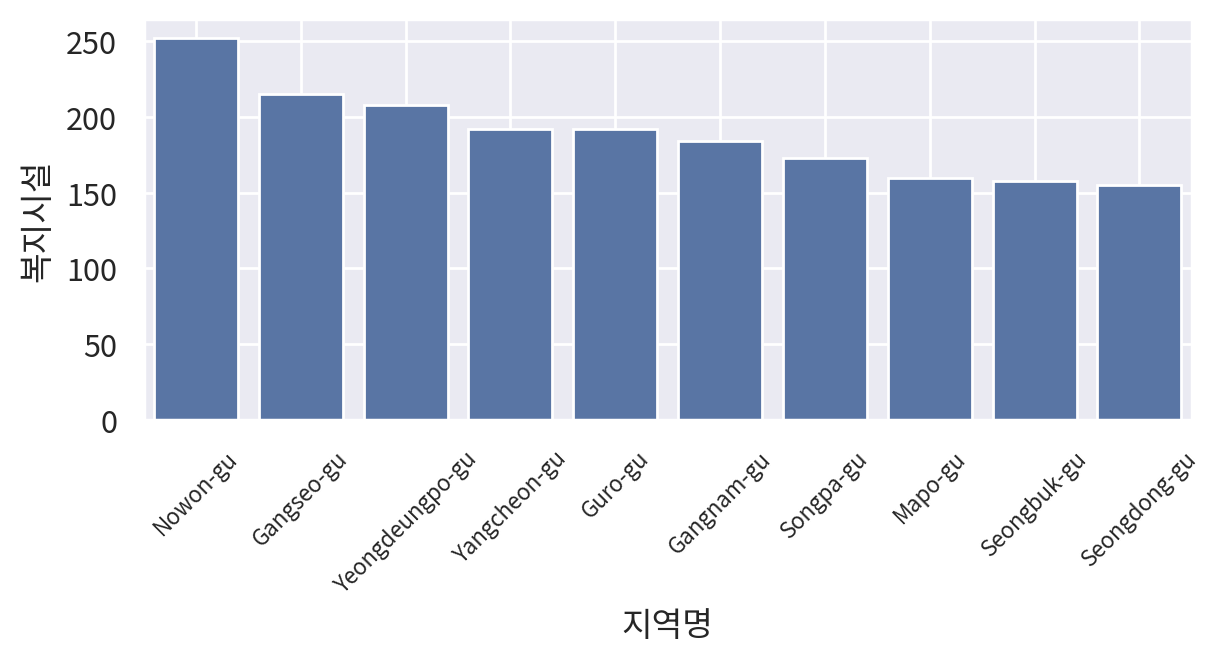

In [137]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=senior_lsf_copy_sorted,          #사용할 데이터 프레임
    x='지역명',          #막대의 카테고리축
    y='복지시설'      #요약할 수치 변수  
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=8, rotation=45)

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


#### 알 수 있었던 객관적 사실 
- 노원구가 서울시에서 복지시설이 가장 많다 
- 복지시설 수 1위 노원구와 2위 강서구의 격차가 약 40개로 큰 편이다

## 02.집단별 요약 | 문제7
jobs_by_scale 다음 데이터는 종사자 규모별 업체수를 2015년과 2016년도에 걸쳐 조사한 데이터이
다. 종사자 규모에 따른 업체 수를 확인할 수 있는 세로 막대 그래프를 구현하시오. 이 때 각 데이터의 범주는
년도로 설정하시오.

In [138]:
senior_lsf =load_data('jobs_by_scale')
senior_lsf

[data] https://data.hossam.kr/data/lab06/jobs_by_scale.xlsx
[desc] 종사자 규모별 업체수를 2015년과 2016년도에 걸쳐 조사한 데이터 (출처: 국가통계포털)
[!] Cannot read metadata


,종사자규모별,2015,2016
0,1~4명,553.5,576.7
1,5~9명,211.6,216.8
2,10~29명,194.7,195.5
3,30~49명,227.4,227.4
4,50~99명,152.8,155.7
5,100~199명,221.9,220.6
6,200~299명,80.9,81.0
7,300~999명,100.5,99.3
8,1000명 이상,557.6,549.7


In [139]:
senior_lsf_melt=senior_lsf.melt(id_vars = '종사자규모별',value_name='업체수',var_name='년도')
senior_lsf_melt

,종사자규모별,년도,업체수
0,1~4명,2015,553.5
1,5~9명,2015,211.6
2,10~29명,2015,194.7
3,30~49명,2015,227.4
4,50~99명,2015,152.8
5,100~199명,2015,221.9
6,200~299명,2015,80.9
7,300~999명,2015,100.5
8,1000명 이상,2015,557.6
9,1~4명,2016,576.7


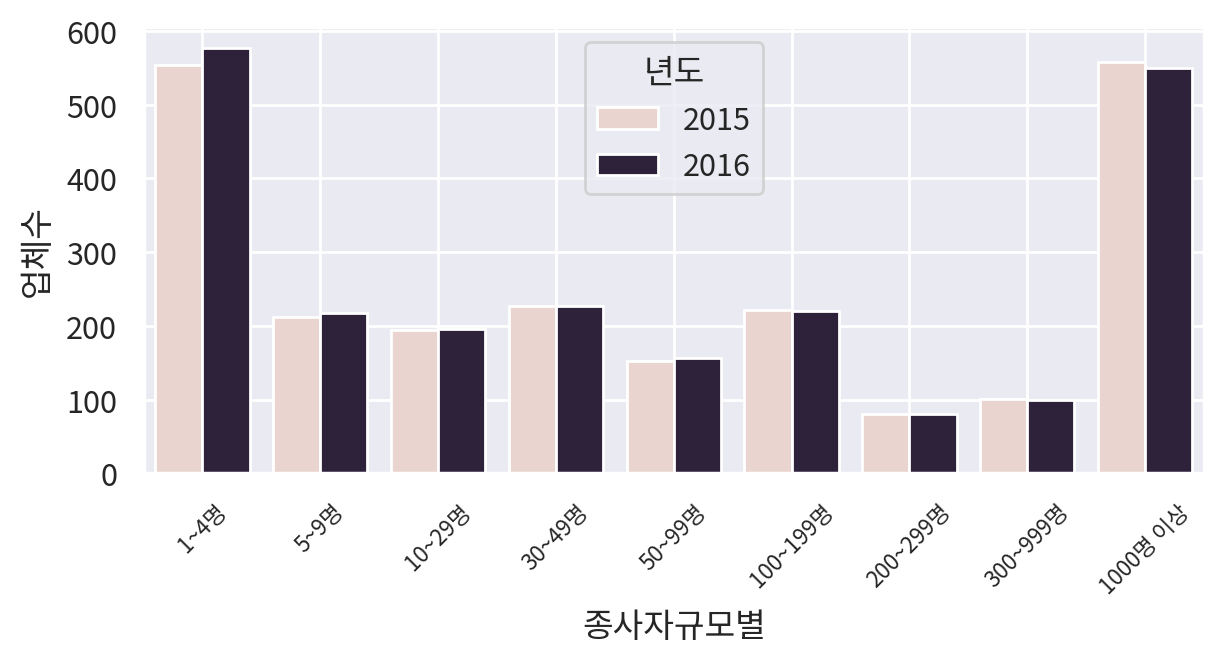

In [140]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=senior_lsf_melt,          #사용할 데이터 프레임
    x='종사자규모별',          #막대의 카테고리축
    y='업체수',                 #요약할 수치 변수  
    hue='년도',            #그룹 구분
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=8, rotation=45)

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


## 03. 서브플롯

covid19_full 데이터는 2020년 2월 5일부터 2023년 5월 31일까지 서울과 전국의 Covid19 확진자 현황을 기록한 데이터이다.
아래의 내용을 모두 반영한 그래프를 생성하세요.

- 데이터 프레임을 생성하는 과정에서 인덱스를 지정하지 마세요.

- 사용자로부터 날짜를 yyyymmdd의 8자리 문자열로 입력받은 후 그 날짜를 시작으로 1주일간의 데이터를 추출하시오.
 
- 2행 1열의 서브플롯을 만들고 각각의 그래프 영역에 대한 twinx를 생성하시오.
첫 번째 영역에는 서울시의 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.

- 두 번째 영역에는 전국에 대한 누적 확진자와 일일 확진자 변동 추이를 확인할 수 있는 시각화 자료를 생성하시오.

- 누적 확진자는 y축을 왼쪽으로 설정한 막대 그래프로 표시하고 일일 확진자는 y축을 오른쪽으로 설정한 시계열 그래프로 생성해야 합니다.

아래의 예시와 최대한 비슷하게 구현하면 됩니다

In [141]:
covid19_full = load_data('covid19_full')
covid19_full_copy= covid19_full.copy()
covid19_full_copy

[data] https://data.hossam.kr/data/lab06/covid19_full.xlsx
[desc] 2020년 2월 5일부터 2023년 5월 31일까지 서울과 전국의 Covid19 확진자 현황을 일단위로 기록한 실제 데이터 (자체수집)
[!] Cannot read metadata


,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
0,2023-05-31,6204277,5987.0,0,NaN,NaN,6492,6.0,31703511.0,24411.0,0,NaN,17.0,34784
1,2023-05-30,6198290,3326.0,0,NaN,NaN,6486,1.0,31679100.0,13529.0,0,NaN,7.0,34767
2,2023-05-29,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
3,2023-05-28,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
4,2023-05-27,6191196,4078.0,0,NaN,NaN,6485,0.0,31647238.0,17796.0,0,NaN,3.0,34784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,2020-02-09,10,0.0,10,0.0,0.0,0,NaN,27.0,0.0,24,3.0,NaN,0
1208,2020-02-08,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1209,2020-02-07,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1210,2020-02-06,11,0.0,11,0.0,0.0,0,NaN,24.0,0.0,23,1.0,NaN,0


In [142]:
covid19_full_copy['날짜'] = pd.to_datetime(covid19_full_copy['날짜']).dt.strftime('%Y%m%d')
covid19_full_copy

,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
0,20230531,6204277,5987.0,0,NaN,NaN,6492,6.0,31703511.0,24411.0,0,NaN,17.0,34784
1,20230530,6198290,3326.0,0,NaN,NaN,6486,1.0,31679100.0,13529.0,0,NaN,7.0,34767
2,20230529,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
3,20230528,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
4,20230527,6191196,4078.0,0,NaN,NaN,6485,0.0,31647238.0,17796.0,0,NaN,3.0,34784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,20200209,10,0.0,10,0.0,0.0,0,NaN,27.0,0.0,24,3.0,NaN,0
1208,20200208,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1209,20200207,10,0.0,10,0.0,0.0,0,NaN,24.0,0.0,22,2.0,NaN,0
1210,20200206,11,0.0,11,0.0,0.0,0,NaN,24.0,0.0,23,1.0,NaN,0


In [143]:
import datetime

# 기준 날짜 설정
start_date = datetime.datetime(2020, 2, 5)
end_date   = datetime.datetime(2023, 5, 31)

a_date = input('yyyymmdd 형태를 입력하세요: ')

try:
    # 1) 입력값이 숫자 8자리인지 확인
    if len(a_date) != 8 or not a_date.isdigit():
        raise ValueError("입력은 반드시 숫자 8자리 yyyymmdd 형태여야 합니다.")

    # 2) yyyymmdd → datetime 변환
    user_date = datetime.datetime.strptime(a_date, "%Y%m%d")

    # 3) 날짜 범위 검사
    if not (start_date <= user_date <= end_date):
        raise ValueError("2020년 2월 5일 ~ 2023년 5월 31일 사이의 날짜를 입력해야 합니다.")

    print("유효한 날짜입니다:", user_date.date())

except ValueError as e:
    print("오류:", e)


유효한 날짜입니다: 2023-05-01


In [144]:
start_date = dt.datetime.strptime(a_date,'%Y%m%d')
d=dt.timedelta(days=6)
end_date = start_date + d


start_date_format = start_date.strftime('%Y%m%d')
end_date_format = end_date.strftime('%Y%m%d')

print(start_date_format, '~', end_date_format)

20230501 ~ 20230507


In [145]:
filtered_df = covid19_full_copy.query("날짜 >= @start_date_format and 날짜 <= @end_date_format")
filtered_df_sorted = filtered_df.sort_values('날짜')

filtered_df_sorted = filtered_df_sorted.astype({
    '서울시 누적 확진자': 'int64',
    '서울시 일일 확진': 'int64',
    '전국 누적 확진': 'int64',
    '전국 일일 확진': 'int64'
})

filtered_df_sorted['서울시 누적 확진자(백만 단위)'] = filtered_df_sorted['서울시 누적 확진자'] / 1000000
filtered_df_sorted['전국 누적 확진자(천만 단위)'] = filtered_df_sorted['전국 누적 확진'] / 10000000


filtered_df_sorted


,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망,서울시 누적 확진자(백만 단위),전국 누적 확진자(천만 단위)
30,20230501,6078397,1112,0,NaN,NaN,6425,2.0,31176660,5774,0,NaN,8.0,34487,6.078397,3.117666
29,20230502,6082360,3963,0,NaN,NaN,6428,3.0,31192401,15741,0,NaN,10.0,34497,6.082360,3.119240
28,20230503,6087497,5137,0,NaN,NaN,6429,1.0,31212598,20197,0,NaN,8.0,34505,6.087497,3.121260
27,20230504,6092424,4927,0,NaN,NaN,6432,3.0,31232744,20146,0,NaN,7.0,34512,6.092424,3.123274
26,20230505,6097034,4650,0,NaN,NaN,6433,1.0,31251203,18752,0,NaN,6.0,34518,6.097034,3.125120
25,20230506,6099419,2385,0,NaN,NaN,6434,1.0,31263004,11801,0,NaN,3.0,34521,6.099419,3.126300
24,20230507,6103182,3763,0,NaN,NaN,6436,2.0,31277746,14742,0,NaN,6.0,34527,6.103182,3.127775


In [146]:

ymin_seoul = filtered_df_sorted['서울시 누적 확진자(백만 단위)'].min()
ymax_seoul = filtered_df_sorted['서울시 누적 확진자(백만 단위)'].max()

ymin_korea = filtered_df_sorted['전국 누적 확진자(천만 단위)'].min()
ymax_korea = filtered_df_sorted['전국 누적 확진자(천만 단위)'].max()

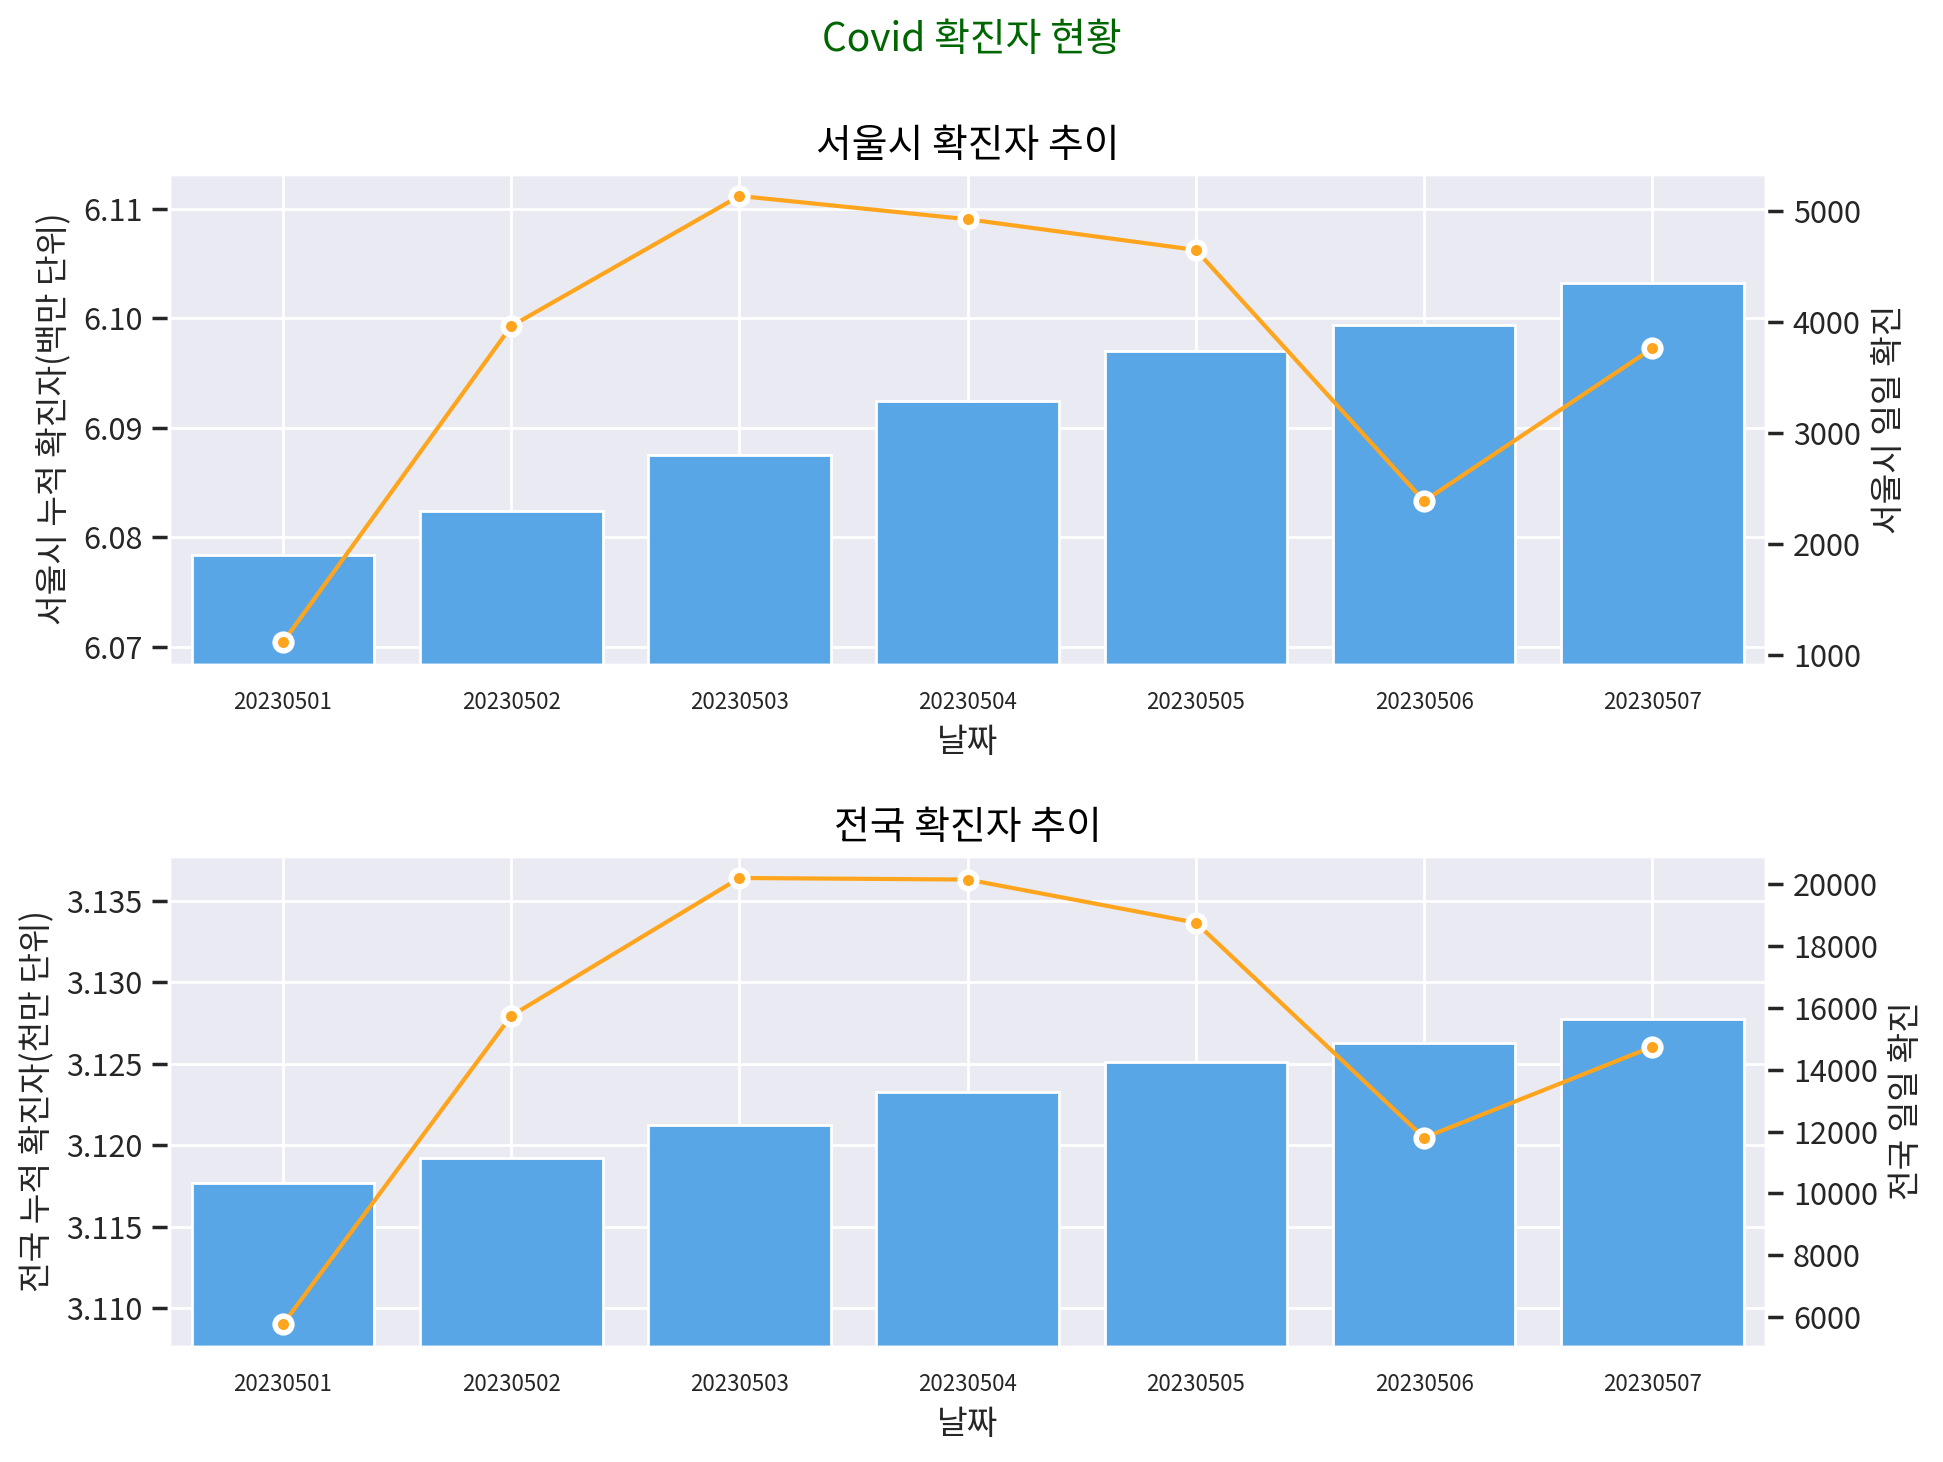

In [147]:
# 1) 그래프 초기화
my_dpi = 200
width_px = 2000
height_px = 1500
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(2, 1, figsize=figsize, dpi=my_dpi)

ax1 = ax[0]
ax1_twin = ax1.twinx()

ax2 = ax[1]
ax2_twin = ax2.twinx()


# 2) 그래프 그리기
sb.lineplot(data=filtered_df_sorted, x='날짜', y='서울시 일일 확진',
           ax=ax1_twin, color="#FFA51D",marker='o',markeredgecolor='white', markeredgewidth=2 )   
sb.barplot(data=filtered_df_sorted, x='날짜', y='서울시 누적 확진자(백만 단위)',
           ax=ax1, color="#41A8FD")  


sb.lineplot(data=filtered_df_sorted, x='날짜', y='전국 일일 확진',
            ax=ax2_twin, color="#FFA51D",marker='o',markeredgecolor='white', markeredgewidth=2 )   
sb.barplot(data=filtered_df_sorted, x='날짜', y='전국 누적 확진자(천만 단위)',
           ax=ax2, color="#41A8FD")   


# 3) 제목 및 서식
fig.suptitle('Covid 확진자 현황',
             fontsize=14, color='#006600')

ax[0].set_title("서울시 확진자 추이", color="#000000", fontsize=14)
ax[1].set_title("전국 확진자 추이", color="#000000", fontsize=14)

ax[0].grid(True)
ax[1].grid(True)

ax[0].set_ylim(ymin_seoul-0.01, ymax_seoul+0.01)
ax[1].set_ylim(ymin_korea-0.01, ymax_korea+0.01)


ax[0].tick_params(axis='x', labelsize=8)
ax[1].tick_params(axis='x', labelsize=8)

# 4) 출력
plt.tight_layout()
plt.show()
plt.close()

## 04.ADSP 기출 데이터셋 활용 
mpg 데이터는 1999년과 2008년에 미국 EPA에서 조사하여 발표한 자동차 주요 모델별 연비 데이터의 일부이다



In [148]:
mpg = load_data('mpg')
mpg

[data] https://data.hossam.kr/data/lab06/mpg.xlsx
[desc] 1999년과 2008년에 미국 EPA에서 조사하여 발표한 자동차 주요 모델별 연비 데이터 (출처: ADsP 기출 / R 내장 데이터)

field         description
------------  ----------------------------------------------------
manufacturer  자동차 제조사
model         자동차 모델명
displ         자동차 배기량
year          제조년도
cyl           엔진 실린더 수
trans         자동차 트랜스미션 종류
drv           자동차 구동 방식. f=전륜구동, r=후륜구동, 4=사륜구동
cty           도심 연비 (마일/갤론)
hwy           고속도로 연비 (마일/갤론)
fl            연료 종류
class         자동차 분류



,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### 4 ADsP 기출 데이터셋 활용 |  문제 1
자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화 하시오

In [149]:
a=DataFrame(mpg.groupby('manufacturer')['id'].count())
a_sorted = a.sort_values('id',ascending=False)
a_sorted = a_sorted.rename(columns={'id': 'number of cars'})
a_sorted

,number of cars
manufacturer,
dodge,37
toyota,34
volkswagen,27
ford,25
chevrolet,19
audi,18
hyundai,14
subaru,14
nissan,13


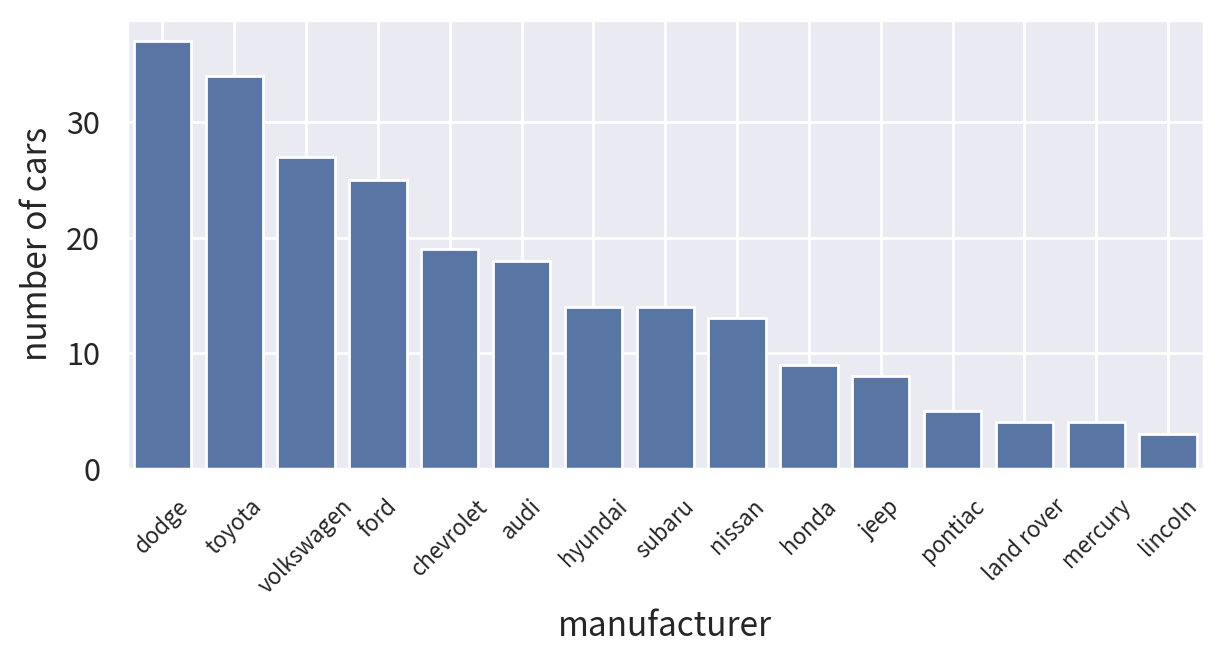

In [150]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=a_sorted,          #사용할 데이터 프레임
    x='manufacturer',          #막대의 카테고리축
    y='number of cars',      #요약할 수치 변수  

)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=8, rotation=45)

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### 4 ADsP 기출 데이터셋 활용 | 문제 2
자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오

In [151]:
filtered = mpg.filter(['id','manufacturer','year'])

a=DataFrame(filtered.groupby(['manufacturer','year'])['id'].count())
a_sorted = a.sort_values('id',ascending=False)
a_sorted = a_sorted.rename(columns={'id': 'number of cars'})

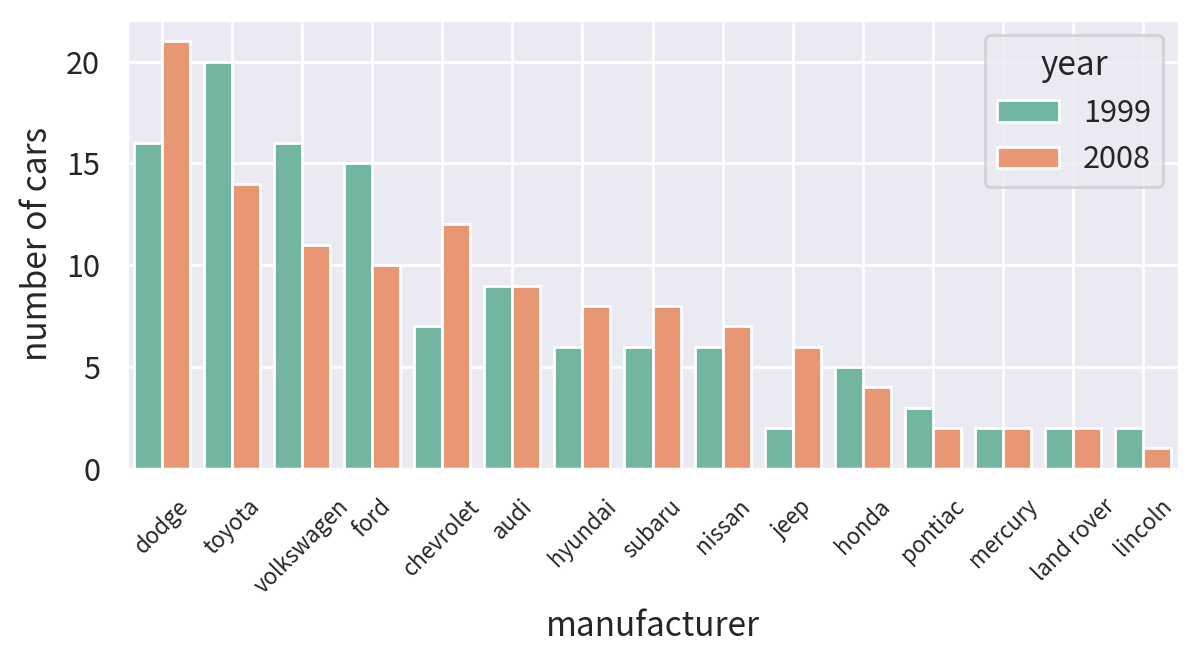

In [152]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=a_sorted,           #사용할 데이터 프레임
    x='manufacturer',        #막대의 카테고리축
    y='number of cars',      #요약할 수치 변수  
    hue = 'year',
    palette='Set2'
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=8, rotation=45)

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### 4 ADsP 기출 데이터셋 활용 | 문제 3
구동방식에 따른 자동차 수를 하나의 그래프로 시각화 하시오.

In [153]:
mpg

categorized= mpg['trans_type'] = np.where(mpg['trans'].str.contains('auto'), 'auto', 'manual')
a= DataFrame (categorized,columns=['trans_type'])
a.reset_index()


,index,trans_type
0,0,auto
1,1,manual
2,2,manual
3,3,auto
4,4,auto
...,...,...
229,229,auto
230,230,manual
231,231,auto
232,232,manual


In [154]:
result=DataFrame(a['trans_type'].value_counts())
result

,count
trans_type,
auto,157
manual,77


C:\Users\itwill\AppData\Local\Temp\ipykernel_11984\307417249.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(


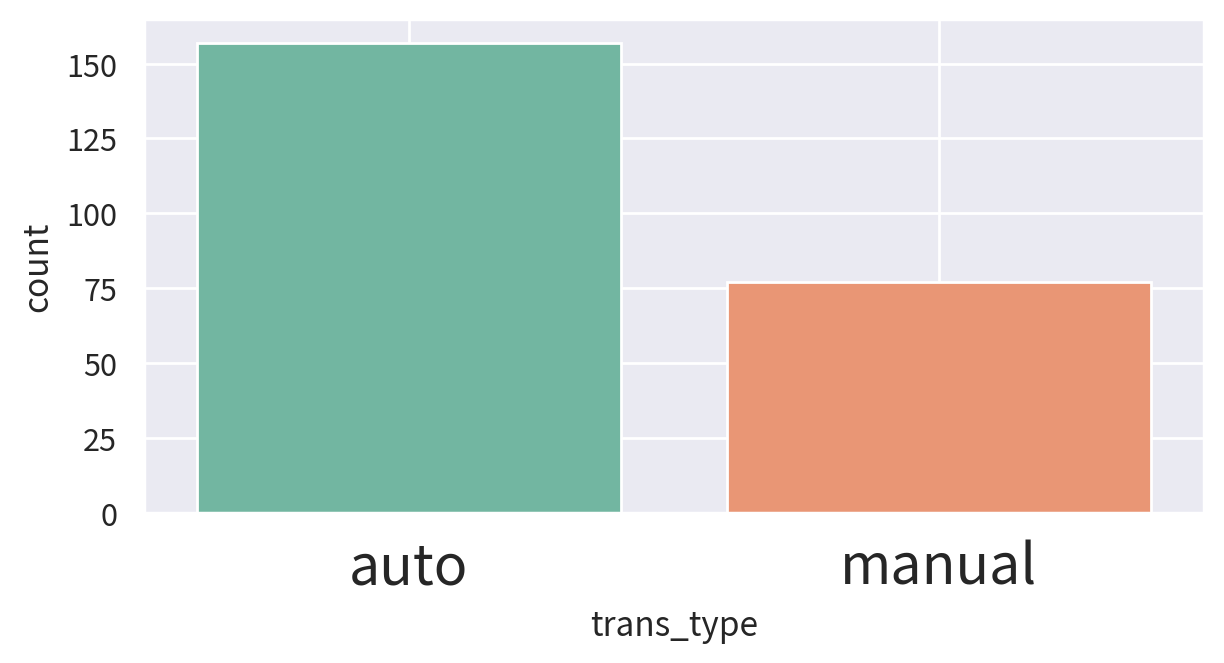

In [155]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=result,           #사용할 데이터 프레임
    x=result.index,        #막대의 카테고리축
    y='count',      #요약할 수치 변수  
    palette='Set2'
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=20)

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### 4 ADsP 기출 데이터셋 활용 | 문제 4
자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화 하시오.

In [156]:
a=mpg.filter(['id','trans','cty'])
a_sorted= DataFrame(a.sort_values('cty',ascending=False))
a_sorted

,id,trans,cty
221,222,manual(m5),35
212,213,manual(m5),33
222,223,auto(l4),29
196,197,manual(m5),28
99,100,manual(m5),28
...,...,...,...
69,70,manual(m6),9
54,55,auto(l5),9
59,60,auto(l5),9
65,66,auto(l5),9


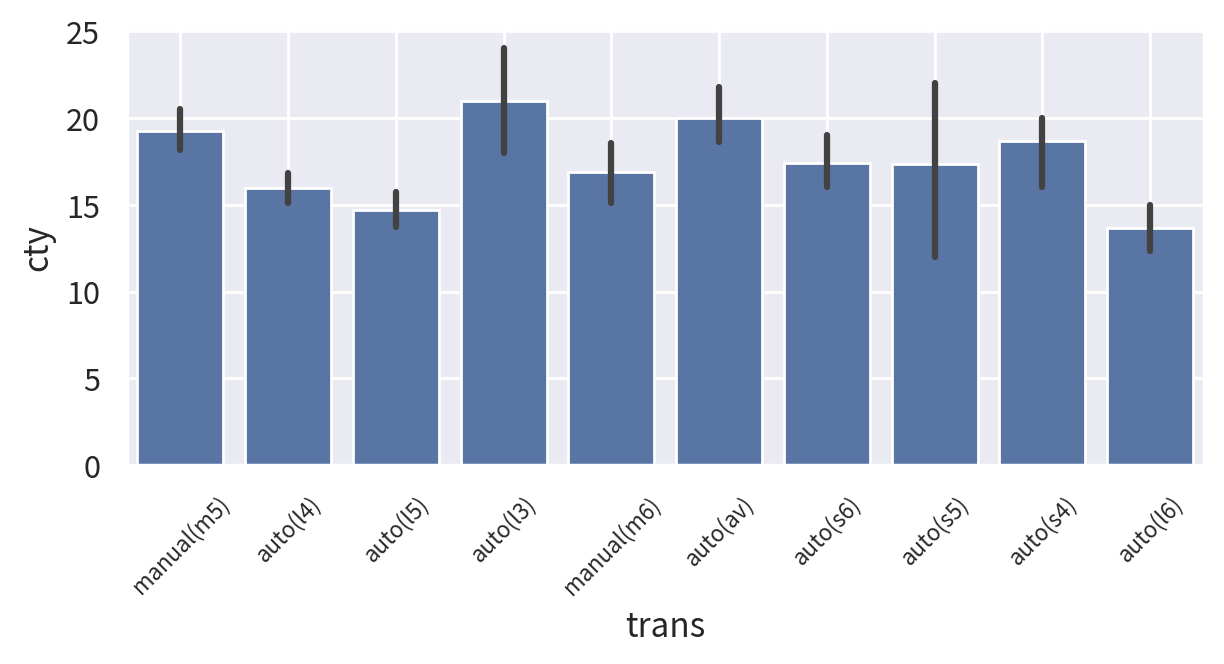

In [157]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 720              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=a_sorted,          #사용할 데이터 프레임
    x='trans',          #막대의 카테고리축
    y='cty',      #요약할 수치 변수  
    estimator = np.mean,
    #errorbar=('ci',95),   #ci 는 신뢰수준
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=8, rotation=45)

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.savefig("plot.png", dpi=my_dpi * 2)
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


### 4 ADsP 기출 데이터셋 활용 | 문제 5
자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화 하시오.

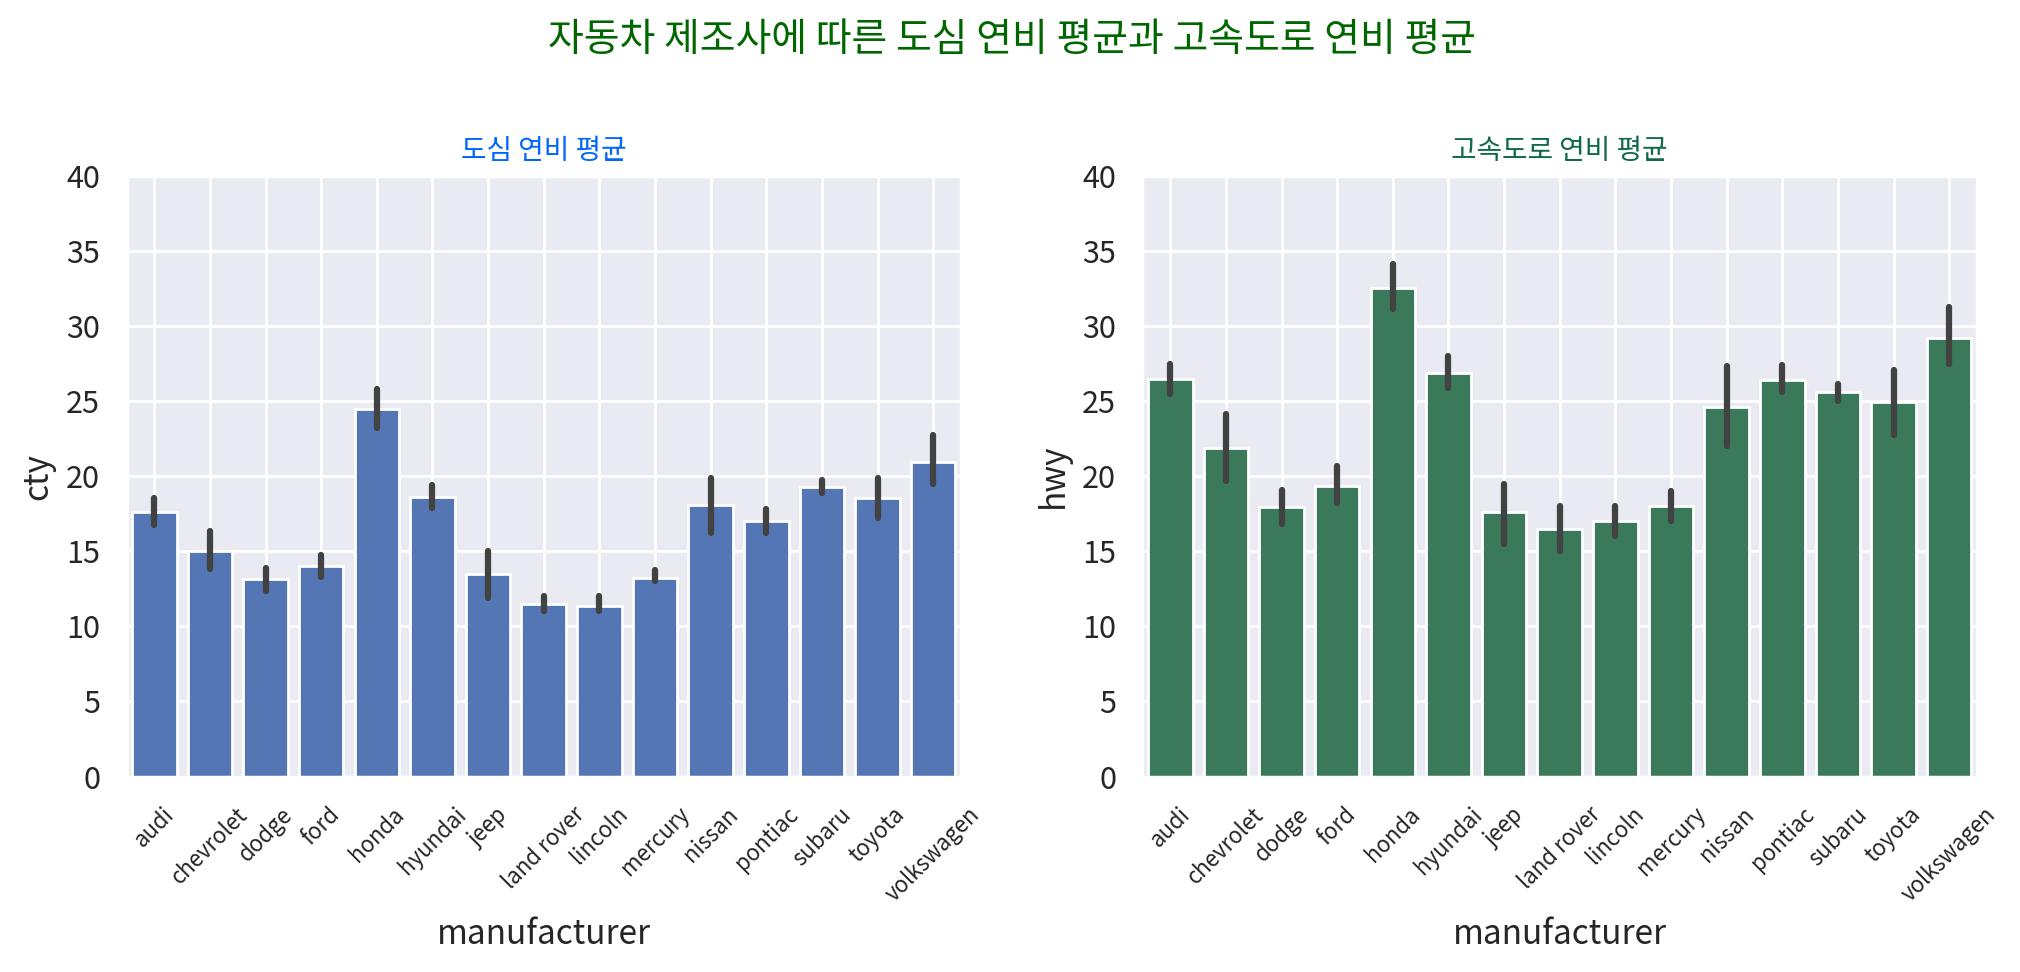

In [158]:
# 1) 그래프 초기화
my_dpi = 200
width_px = 2080
height_px = 1000
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(1, 2, figsize=figsize, dpi=my_dpi)

# 2) 단색 barplot
sb.barplot(data=mpg, x='manufacturer', y='cty',
           estimator=np.mean, ax=ax[0], color="#4472C4")   # 진한 파랑

sb.barplot(data=mpg, x='manufacturer', y='hwy',
           estimator=np.mean, ax=ax[1], color="#2F855A")   # 진한 초록

# 3) 제목 및 서식
fig.suptitle('자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균',
             fontsize=14, color='#006600')

ax[0].set_title("도심 연비 평균", color="#0066ff", fontsize=10)
ax[1].set_title("고속도로 연비 평균", color="#0f6a46", fontsize=10)

ax[0].grid(True)
ax[1].grid(True)

ax[0].set_ylim(0, 40)
ax[1].set_ylim(0, 40)


ax[0].tick_params(axis='x', rotation=45, labelsize=8)
ax[1].tick_params(axis='x', rotation=45, labelsize=8)

# 4) 출력
plt.tight_layout()
plt.show()
plt.close()


### 4 ADsP 기출 데이터셋 활용 | 문제 6
배기량(displ) 과 도심연비 (cty), 배기량과 고속도로 연비 (hwy) 의 상관관계를 확인하고자 한다.
서브플롯에 각 그래프를 시각화 하고 추세선을 포함시키시오.


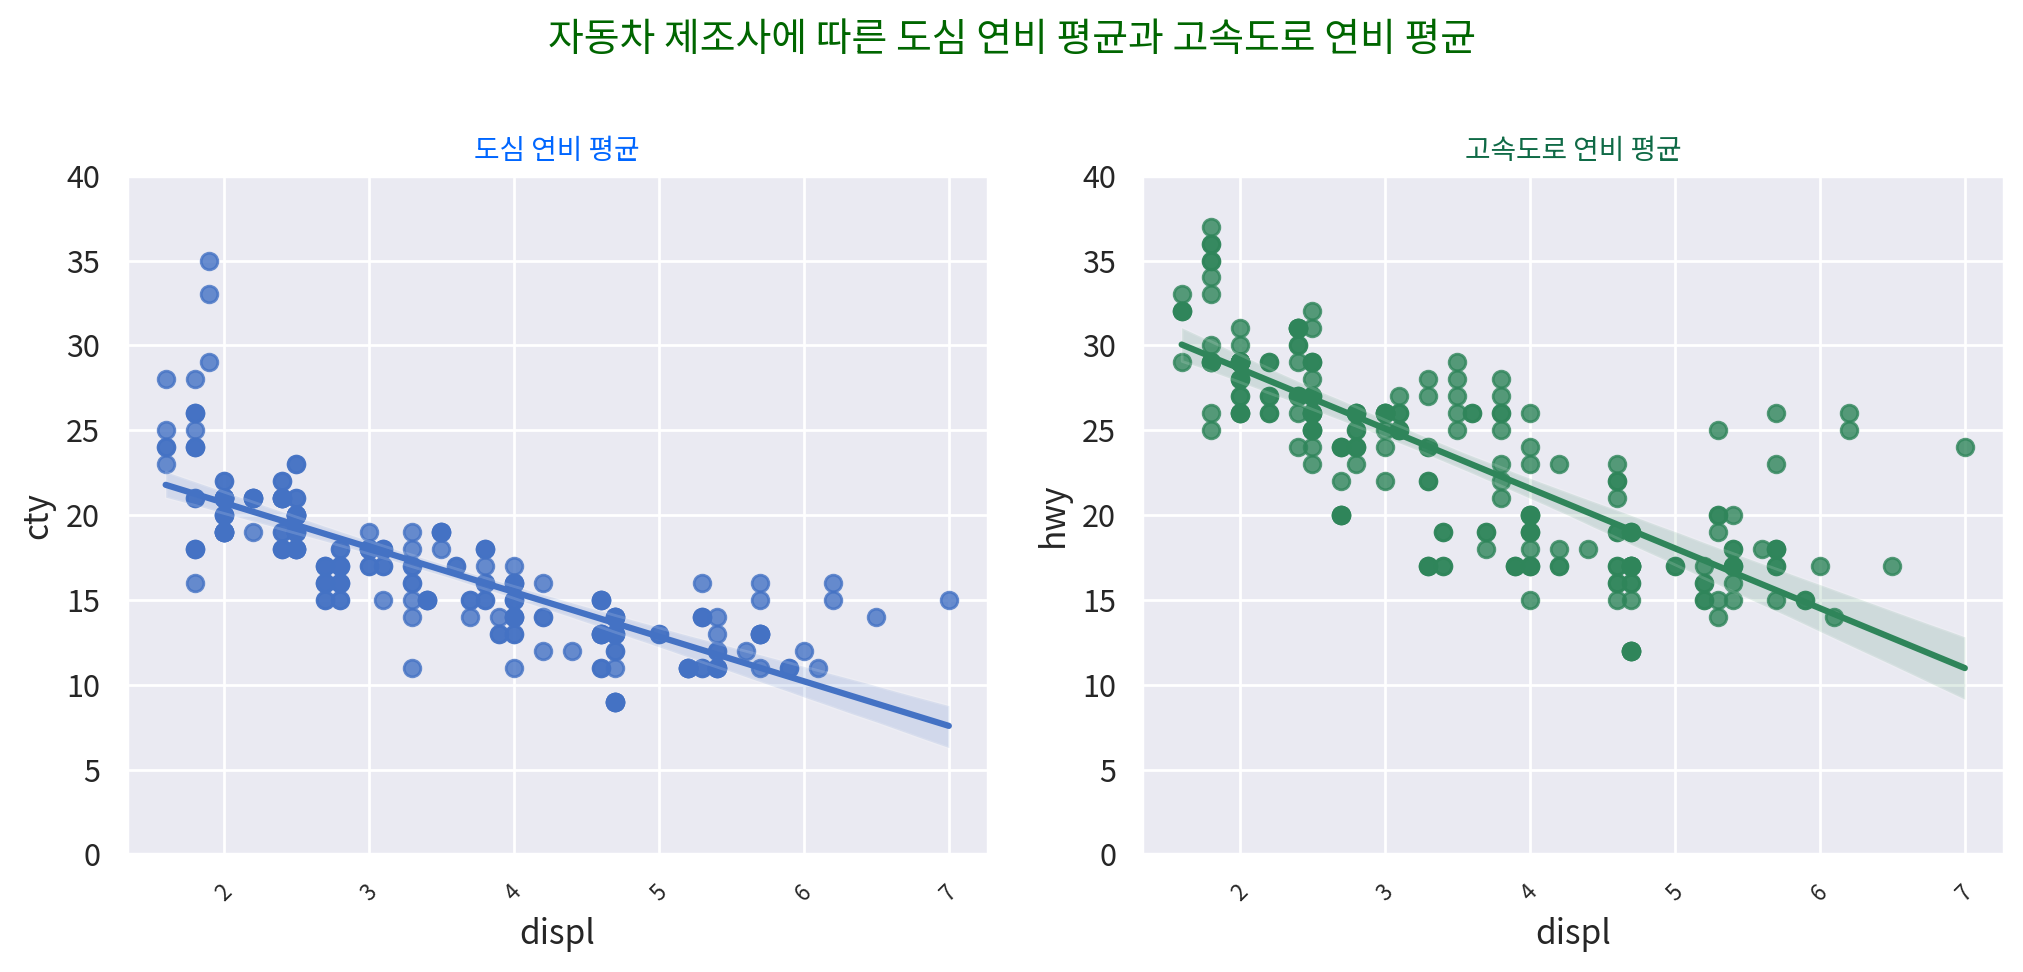

In [159]:
# 1) 그래프 초기화
my_dpi = 200
width_px = 2080
height_px = 1000
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(1, 2, figsize=figsize, dpi=my_dpi)

# 2) 단색 barplot
sb.regplot(data=mpg, x='displ', y='cty',
           ax=ax[0], color="#4472C4")   # 진한 파랑

sb.regplot(data=mpg, x='displ', y='hwy',
            ax=ax[1], color="#2F855A")   # 진한 초록

# 3) 제목 및 서식
fig.suptitle('자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균',
             fontsize=14, color='#006600')

ax[0].set_title("도심 연비 평균", color="#0066ff", fontsize=10)
ax[1].set_title("고속도로 연비 평균", color="#0f6a46", fontsize=10)

ax[0].grid(True)
ax[1].grid(True)

ax[0].set_ylim(0, 40)
ax[1].set_ylim(0, 40)


ax[0].tick_params(axis='x', rotation=45, labelsize=8)
ax[1].tick_params(axis='x', rotation=45, labelsize=8)

# 4) 출력
plt.tight_layout()
plt.show()
plt.close()


### 4 ADsP 기출 데이터셋 활용 | 문제 7
철수는 새로 자동차를 구입하고자 한다. 철수가 고려하는 가장 중요한 조건은 연비이다.
철수는 자동차의 평균연비를 고속도로 연비와 도심연비에 대한 평균으로 계산하기로 하고 이를 확인하기 위해 전체 자동차에 대한 평균연비를 구한 후 이 값보다 높은 연비를 갖는 자동차의 경우 Pass를, 그렇지 않을 경우 Fail로 구분하기로 했다.


1. Pass 등급과 Fail 등급의 비율을 시각화 하라.

2. Pass 등급과 Fail 등급이 각각 몇 대씩 있는지 실제 수량을 시각화 하라.
 
3. Pass 등급을 받은 자동차들에 대해 연비가 높은 순으로 각각의 연비를 시각화 하라 (전처리 과정에서 발생하는 결측치는 모두 삭제하고 같은 모델에 대해서는 평균값을 사용한다.)

4. 위의 세가지 조건을 만족하는 1행 3열의 서브플롯을 생성하시오


In [160]:
mpg['평균 연비'] = (mpg['cty'] + mpg['hwy'] )/2
전체평균연비 = mpg['평균 연비'].mean()
mpg['연비_판정'] = np.where(mpg['평균 연비'] > 전체평균연비, 'Pass', 'Fail')
mpg


,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_type,평균 연비,연비_판정
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto,23.5,Pass
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual,25.0,Pass
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual,25.5,Pass
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto,25.5,Pass
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto,21.0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,auto,23.5,Pass
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,manual,25.0,Pass
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,auto,21.0,Pass
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,manual,22.0,Pass


In [161]:
total_count=len(mpg)
pass_count = len(mpg.query('연비_판정 == "Pass"'))
fail_count = len(mpg.query('연비_판정 == "Fail"'))

Pass_ratio = pass_count/total_count*100
Fail_ratio = fail_count/total_count*100
print(Pass_ratio,Fail_ratio)

Pass_Fail_ratio = pd.DataFrame({'비율(%)': [Pass_ratio, Fail_ratio]}, index=['Pass', 'Fail']).round(1)
Pass_Fail_ratio



52.56410256410257 47.43589743589743


,비율(%)
Pass,52.6
Fail,47.4


1. Pass 등급과 Fail 등급의 비율을 시각화 하라.

C:\Users\itwill\AppData\Local\Temp\ipykernel_11984\3883229538.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(


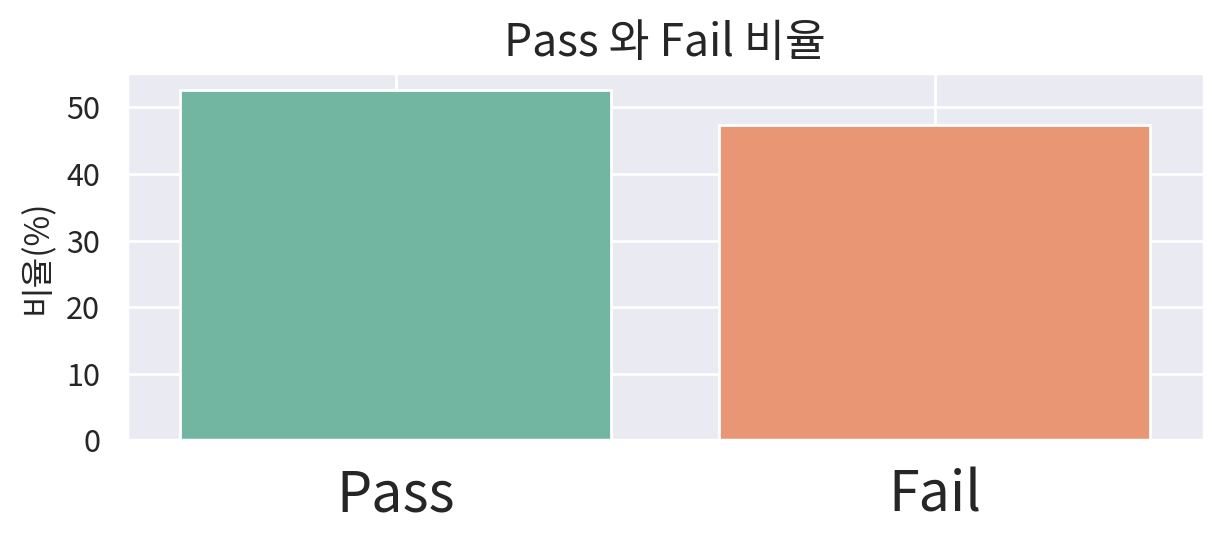

In [162]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 600              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=Pass_Fail_ratio,           #사용할 데이터 프레임
    x=Pass_Fail_ratio.index,        #막대의 카테고리축
    y='비율(%)',      #요약할 수치 변수  
    palette='Set2'
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=20)
ax.set_xlabel('')
ax.set_title('Pass 와 Fail 비율', fontsize=16, fontweight='bold')

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


2. Pass 등급과 Fail 등급이 각각 몇 대씩 있는지 실제 수량을 시각화 하라.

In [163]:
total_count=len(mpg)
pass_count = len(mpg.query('연비_판정 == "Pass"'))
fail_count = len(mpg.query('연비_판정 == "Fail"'))


Pass_Fail_count= pd.DataFrame({'Pass 와 Fail 수량': [pass_count, fail_count]}, index=['Pass_count', 'Fail_count']).round(1)
Pass_Fail_count

,Pass 와 Fail 수량
Pass_count,123
Fail_count,111


C:\Users\itwill\AppData\Local\Temp\ipykernel_11984\1610738613.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(


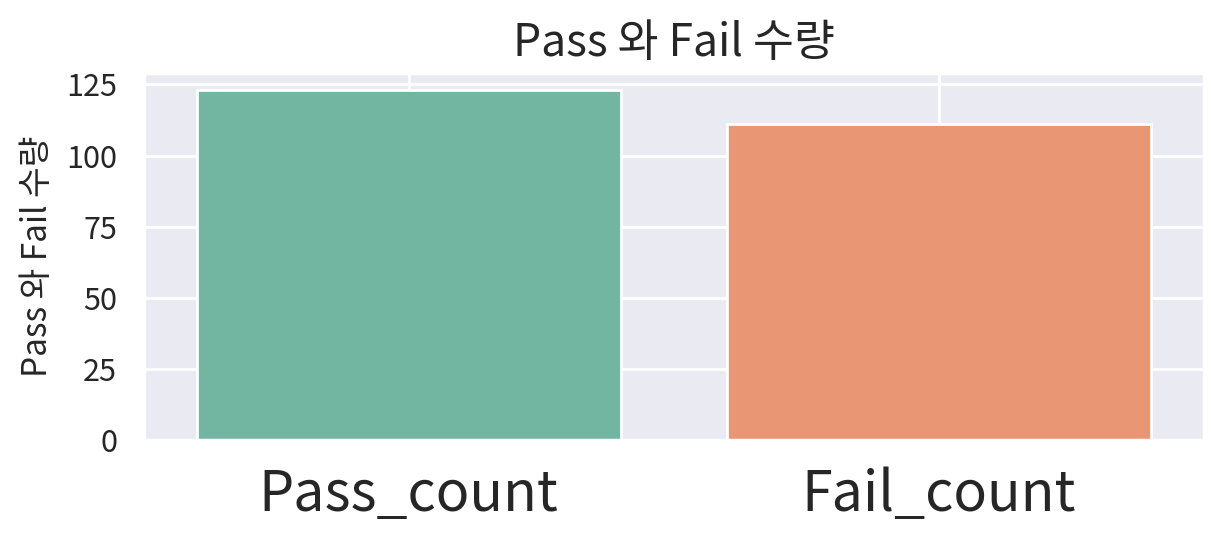

In [164]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280              # 그래프 가로 크기
height_px = 600              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 1                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) barplot 그리기
sb.barplot(
    data=Pass_Fail_count,           #사용할 데이터 프레임
    x=Pass_Fail_count.index,        #막대의 카테고리축
    y='Pass 와 Fail 수량',      #요약할 수치 변수  
    palette='Set2'
)

# 3) 그래프 꾸미기
ax.grid(True)                          # 배경 격자 표시/숨김
plt.xticks(fontsize=20)
ax.set_xlabel('')
ax.set_title('Pass 와 Fail 수량', fontsize=16, fontweight='bold')

# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료


3. Pass 등급을 받은 자동차들에 대해 연비가 높은 순으로 각각의 연비를 시각화 하라 (전처리 과정에서 발생하는 결측치는 모두 삭제하고 같은 모델에 대해서는 평균값을 사용한다.)

In [165]:
mpg_copy = mpg.copy()
mpg_copy

,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_type,평균 연비,연비_판정
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto,23.5,Pass
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual,25.0,Pass
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual,25.5,Pass
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto,25.5,Pass
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto,21.0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,auto,23.5,Pass
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,manual,25.0,Pass
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,auto,21.0,Pass
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,manual,22.0,Pass


In [173]:
mpg_copy_Pass = mpg_copy.query("연비_판정 == 'Pass'")
mpg_copy_Pass['manufacturer_model'] = mpg_copy_Pass['manufacturer'] + "-" + mpg_copy_Pass['model']
mpg_copy_Pass['groupby_mean'] = (mpg_copy_Pass.groupby('manufacturer_model')['평균 연비'].transform('mean'))

mpg_copy_Pass_sorted = mpg_copy_Pass.sort_values('groupby_mean', ascending=False)


mpg_copy_Pass_sorted

C:\Users\itwill\AppData\Local\Temp\ipykernel_11984\1985928746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg_copy_Pass['manufacturer_model'] = mpg_copy_Pass['manufacturer'] + "-" + mpg_copy_Pass['model']
C:\Users\itwill\AppData\Local\Temp\ipykernel_11984\1985928746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mpg_copy_Pass['groupby_mean'] = (mpg_copy_Pass.groupby('manufacturer_model')['평균 연비'].transform('mean'))


,id,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_type,평균 연비,연비_판정,manufacturer_model,groupby_mean
194,195,toyota,corolla,1.8,1999,4,auto(l4),f,24,33,r,compact,auto,28.5,Pass,toyota-corolla,29.800
195,196,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,manual,30.5,Pass,toyota-corolla,29.800
196,197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,manual,32.5,Pass,toyota-corolla,29.800
197,198,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,auto,30.5,Pass,toyota-corolla,29.800
193,194,toyota,corolla,1.8,1999,4,auto(l3),f,24,30,r,compact,auto,27.0,Pass,toyota-corolla,29.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,manual,21.0,Pass,chevrolet-corvette,21.000
38,39,dodge,caravan 2wd,3.0,1999,6,auto(l4),f,17,24,r,minivan,auto,20.5,Pass,dodge-caravan 2wd,20.625
37,38,dodge,caravan 2wd,2.4,1999,4,auto(l3),f,18,24,r,minivan,auto,21.0,Pass,dodge-caravan 2wd,20.625
42,43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,17,24,r,minivan,auto,20.5,Pass,dodge-caravan 2wd,20.625


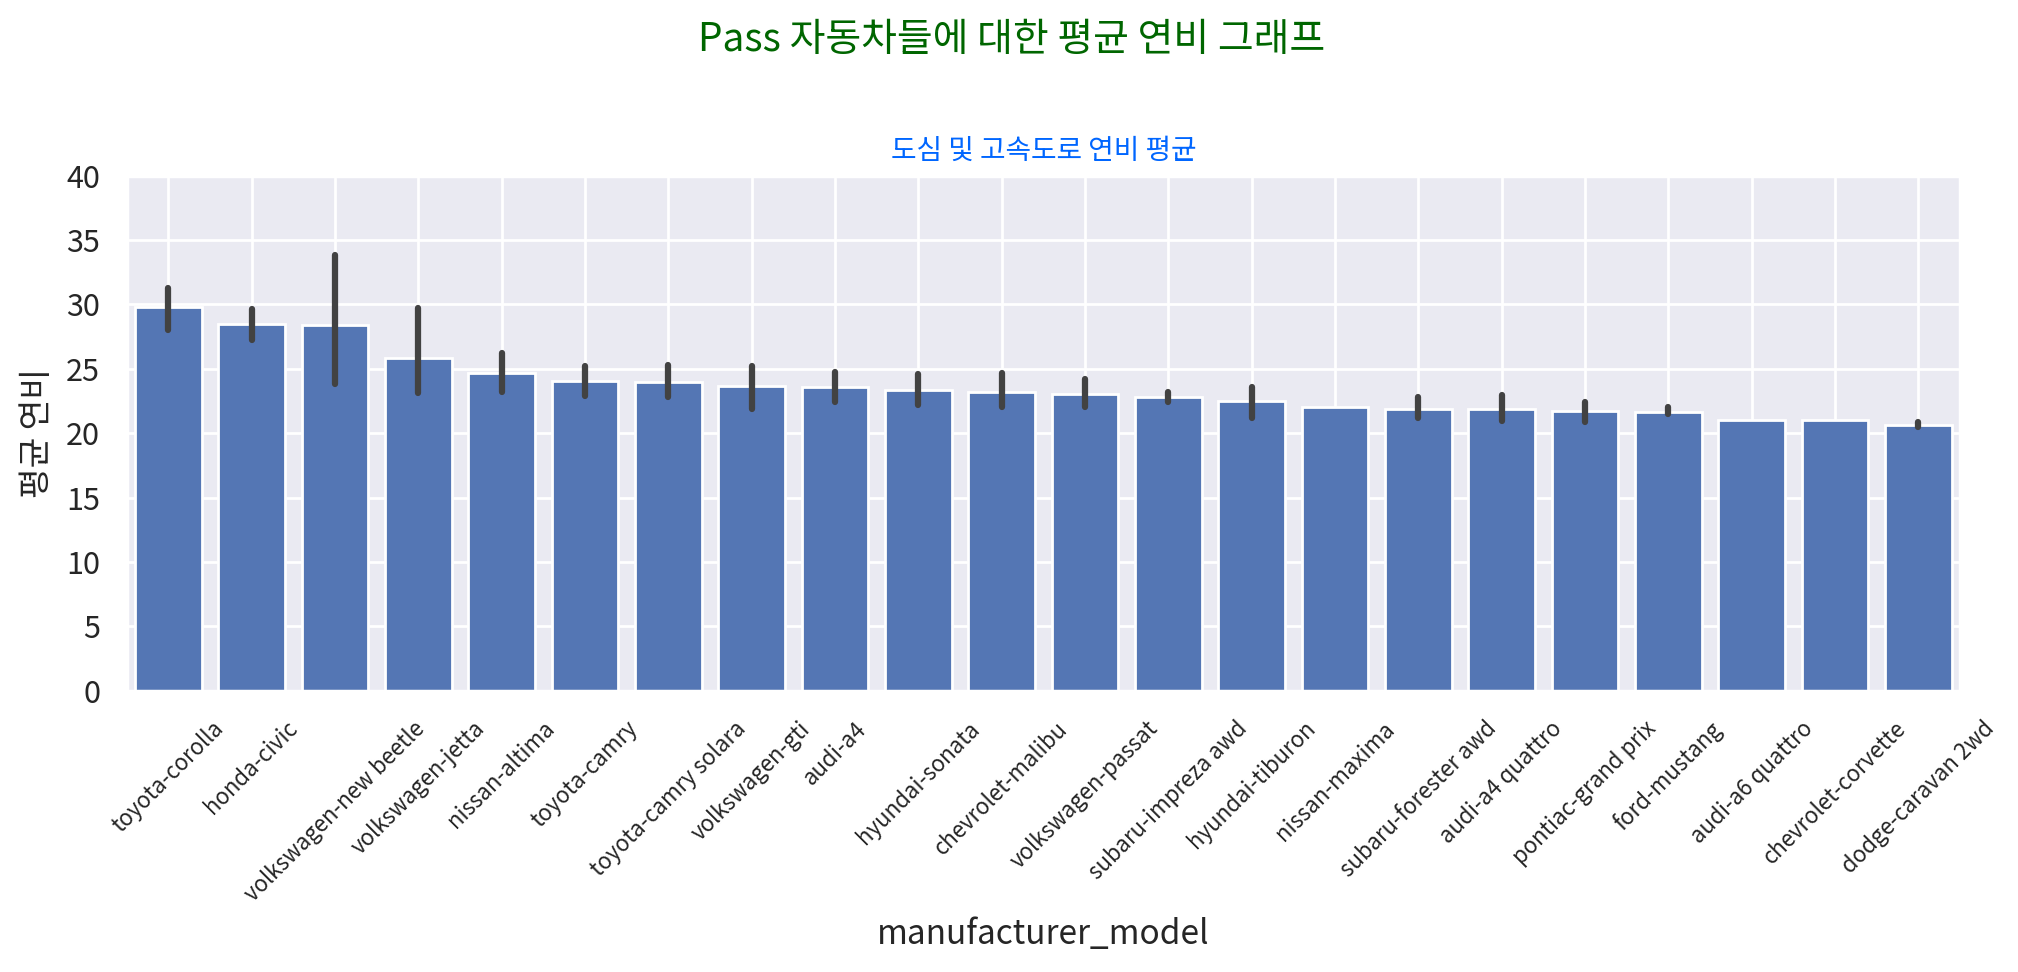

In [174]:
# 1) 그래프 초기화
my_dpi = 200
width_px = 2080
height_px = 1000
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)

# 2) 단색 barplot
sb.barplot(data=mpg_copy_Pass_sorted, x='manufacturer_model', y='평균 연비',
           estimator=np.mean, ax=ax, color="#4472C4")   


# 3) 제목 및 서식
fig.suptitle('Pass 자동차들에 대한 평균 연비 그래프',
             fontsize=14, color='#006600')

ax.set_title("도심 및 고속도로 연비 평균", color="#0066ff", fontsize=10)
ax.grid(True)
ax.set_ylim(0, 40)
ax.tick_params(axis='x', rotation=45, labelsize=8)


# 4) 출력
plt.tight_layout()
plt.show()
plt.close()


4. 위의 세가지 조건을 만족하는 1행 3열의 서브플롯을 생성하시오

C:\Users\itwill\AppData\Local\Temp\ipykernel_11984\4248052258.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(
C:\Users\itwill\AppData\Local\Temp\ipykernel_11984\4248052258.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(


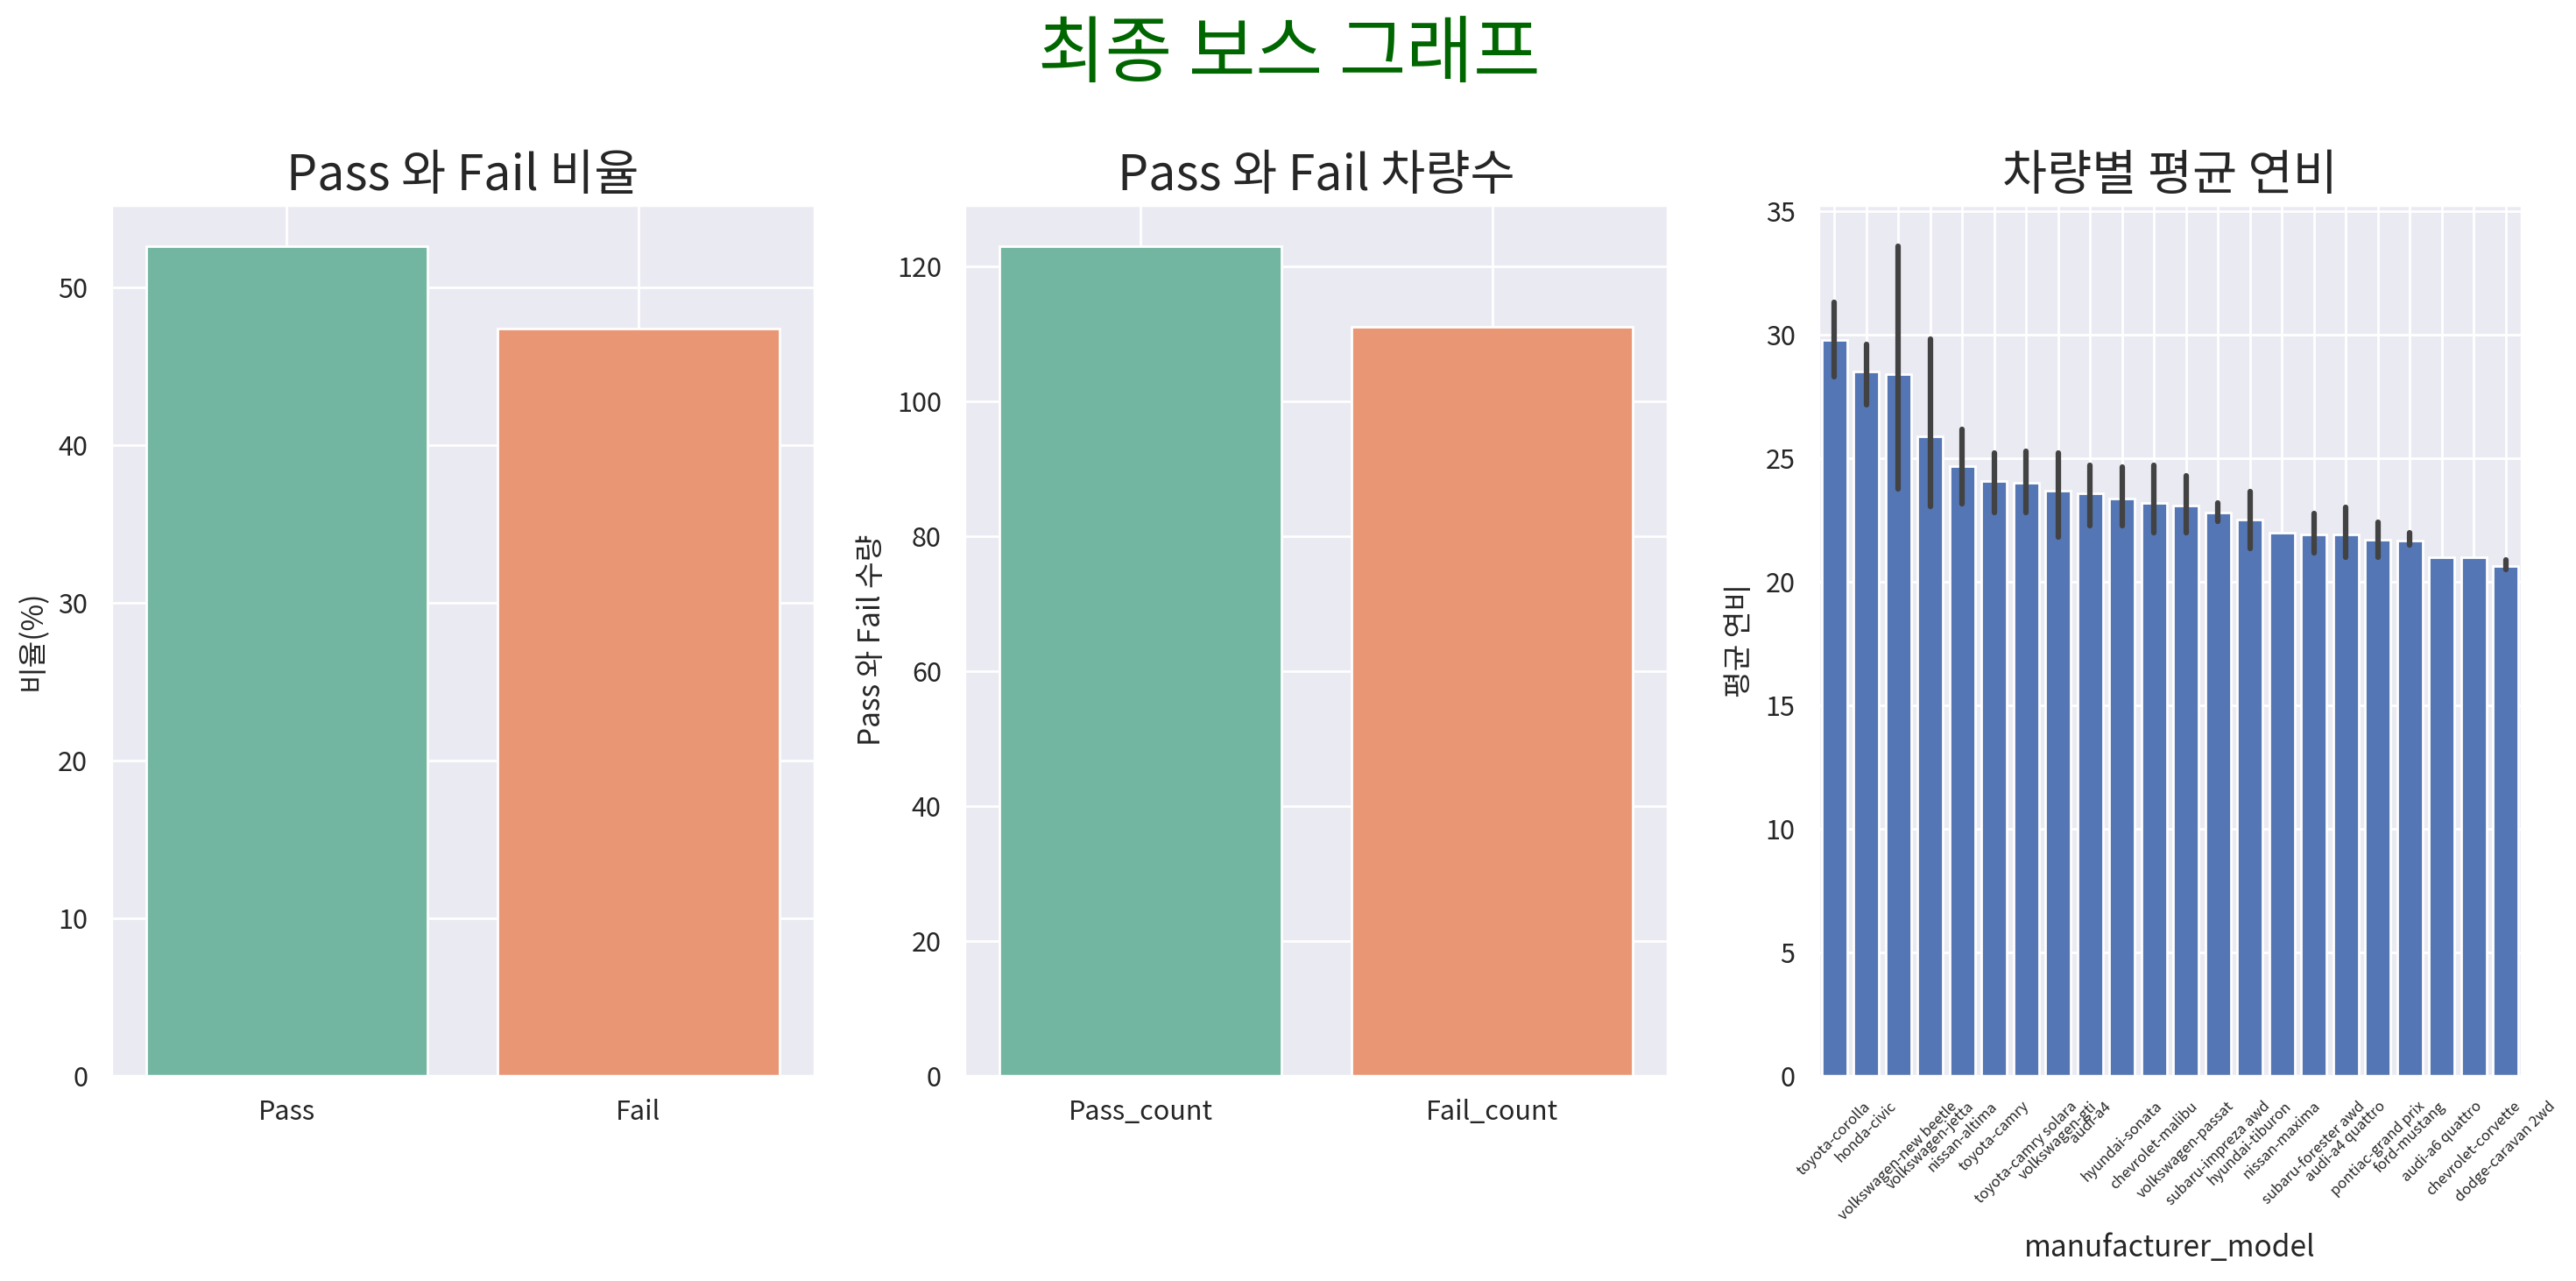

In [175]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 3000             # 그래프 가로 크기
height_px = 1500              # 그래프 세로 크기
rows = 1                     # 그래프 행 수
cols = 3                     # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)

 # ax 객체가 행,열 수에 따라서 리스트가 된다.
 #               = [fig, [ax1, ax2]]
fig, [ax1,ax2,ax3] = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) 그래프 그리기
sb.barplot(
    data=Pass_Fail_ratio,           #사용할 데이터 프레임
    x=Pass_Fail_ratio.index,        #막대의 카테고리축
    y='비율(%)',      #요약할 수치 변수  
    palette='Set2',ax=ax1
)




sb.barplot(
    data=Pass_Fail_count,           #사용할 데이터 프레임
    x=Pass_Fail_count.index,        #막대의 카테고리축
    y='Pass 와 Fail 수량',      #요약할 수치 변수  
    palette='Set2',ax=ax2
)



sb.barplot(data=mpg_copy_Pass_sorted, x='manufacturer_model', y='평균 연비',
           estimator=np.mean, ax=ax3, color="#4472C4")   



 # 3) 그래프 꾸미기
# 전체 제목
fig.suptitle('최종 보스 그래프', fontsize=30, color='#006600')

 # 각 그래프 간의 가로(wspace),세로(hspace) 간격 지정
fig.subplots_adjust(wspace=0.2, hspace=0.2)
ax1.title.set_text("Pass 와 Fail 비율")
ax1.title.set_fontsize(20)
ax1.grid()
ax1.set_xlabel('')



ax2.title.set_text("Pass 와 Fail 차량수")
ax2.title.set_fontsize(20)
ax2.grid()
ax2.set_xlabel('')



ax3.title.set_text("차량별 평균 연비")
ax3.title.set_fontsize(20)
ax3.grid()
ax3.tick_params(axis='x', rotation=45, labelsize=6)


# 4) 출력
plt.tight_layout()                     # 여백 제거
plt.show()                             # 그래프 화면 출력
plt.close()                            # 그래프 작업 종료
